## Measuring Bitcoin, Ethereum, Cardano and BinanceCoin's Price over time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python

# sklearn is a library used for machine learning and statistical modeling.
# it includes many tools for classification, regression, clustering and dimensionality reduction

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

In [2]:
BTC = pd.read_csv("coin_Bitcoin2017-2021.csv")
ADA = pd.read_csv("coin_Cardano2017-2021.csv")
ETH = pd.read_csv("coin_Ethereum2017-2021.csv")
BNB = pd.read_csv("coin_BinanceCoin2017-2021.csv")

# importing the data (csvs from Kaggle)
# crypto price data from 2017 - 2021

In [3]:
df_btc = pd.read_csv("coin_Bitcoin2017-2021.csv")
df_ada = pd.read_csv("coin_Cardano2017-2021.csv")
df_eth = pd.read_csv("coin_Ethereum2017-2021.csv")
df_bnb = pd.read_csv("coin_BinanceCoin2017-2021.csv")

# storing each coin into their own dataframes

In [4]:
df_btc.head()

# showing 5 rows of btc data for example

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,02/10/2017 23:59,4470.229980,4377.459961,4395.810059,4409.319824,1.431730e+09,7.319565e+10
1,Bitcoin,BTC,03/10/2017 23:59,4432.470215,4258.890137,4408.459961,4317.479980,1.288020e+09,7.168107e+10
2,Bitcoin,BTC,04/10/2017 23:59,4352.310059,4210.419922,4319.370117,4229.359863,1.116770e+09,7.022503e+10
3,Bitcoin,BTC,05/10/2017 23:59,4362.640137,4164.049805,4229.879883,4328.410156,1.161770e+09,7.187628e+10
4,Bitcoin,BTC,06/10/2017 23:59,4413.270020,4320.529785,4324.459961,4370.810059,1.069940e+09,7.258926e+10


In [5]:
df = pd.DataFrame({'BTC': df_btc['Close'],
                  'ETH': df_eth['Close'],
                  'ADA': df_ada['Close'],
                  'BNB': df_bnb['Close']})

# dataframe that holds the closing price of all 4 crypto currencies
# the 'closing price' is the price of the coin at the end of each day

In [6]:
df

,BTC,ETH,ADA,BNB
0,4409.319824,297.475006,0.025932,1.964670
1,4317.479980,292.463013,0.020816,1.820700
2,4229.359863,292.657989,0.021931,1.601480
3,4328.410156,295.863007,0.021489,1.678490
4,4370.810059,308.588013,0.018539,1.579910
...,...,...,...,...
1240,48824.426870,1570.203925,0.954709,230.994252
1241,49705.333320,1626.575705,1.051657,254.359132
1242,47093.853020,1475.703735,1.079116,233.885956
1243,46339.760080,1446.033650,1.241105,221.680429


In [7]:
df.describe()

# looking at some stats of the 4 coins

,BTC,ETH,ADA,BNB
count,1245.000000,1245.000000,1245.000000,1245.000000
mean,10225.772687,384.433264,0.138757,20.051816
std,7735.054259,328.989955,0.177812,25.279358
min,3236.761645,84.308296,0.018539,1.152570
25%,6550.160156,177.340420,0.044328,10.245000
50%,8550.760557,247.520125,0.080952,15.755114
75%,10583.134520,463.449005,0.143573,23.019952
max,57539.943670,1960.164744,1.324860,332.616033


## Prices over Time

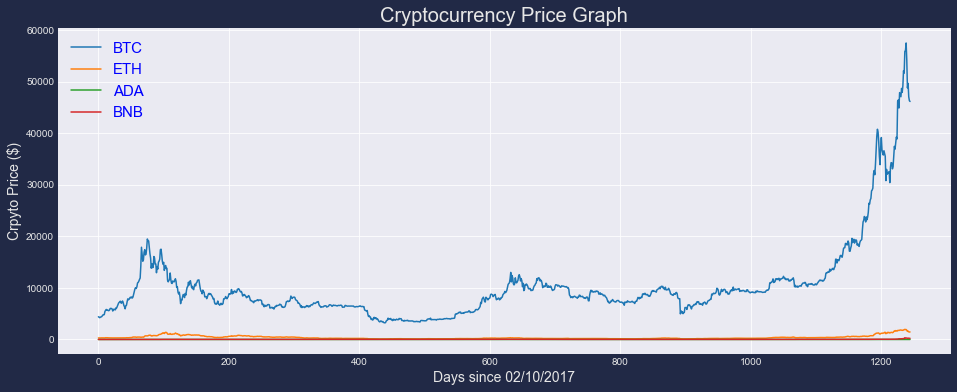

In [8]:
plt.style.use('seaborn-dark')
for param in ['figure.facecolor', 'lines.markerfacecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
plt.rcParams.color='#2A3459'

# Styling and colouring the graph


my_crypto = df
plt.figure(figsize = (16, 6))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Price Graph', fontsize = 20)
plt.xlabel('Days since 02/10/2017', fontsize = 14)
plt.ylabel('Crpyto Price ($)', fontsize = 14)
plt.legend(my_crypto.columns.values, loc= 'upper left')
legend = plt.legend(prop={'size': 15})
plt.setp(legend.get_texts(), color='b')
plt.grid()
plt.show()

# line graph showing the 4 coin's prices over time since 02/10/2017

## Scaling the Data

In [9]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled

# scaling the data so the price of altcoins (non-bitcoin coins) become meaningful in the graph

array([[  2.15928079,  11.36370059,   0.56591741,   0.24500436],
       [  1.99015655,  11.09651631,   0.17428332,   0.20156974],
       [  1.82788224,  11.10691033,   0.25969096,   0.13543272],
       ...,
       [ 80.76339128,  74.17387618,  81.18808054,  70.21388851],
       [ 79.37471954,  72.59219411,  93.58849105,  66.53157412],
       [ 79.09608246,  73.33529314, 100.        ,  67.60831847]])

In [10]:
df_scale = pd.DataFrame(scaled, columns = df.columns)

# converting the array of scaled data into a dataframe

## Scaled Prices Over Time

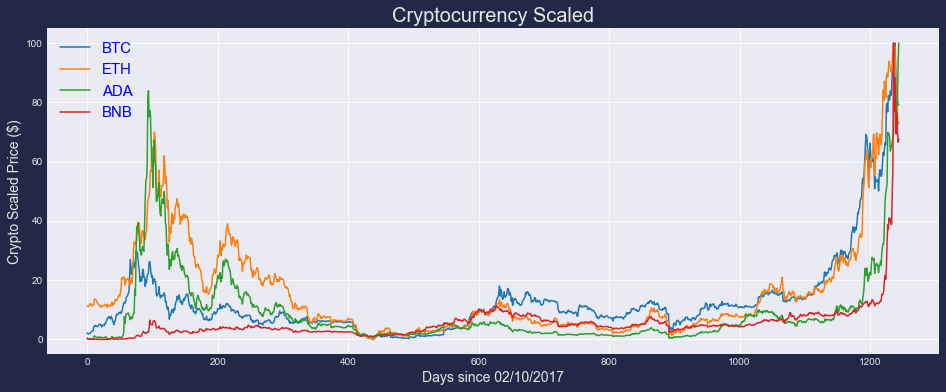

In [11]:
my_crypto = df_scale

plt.figure(figsize=(16, 6))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c], label=c)
    
plt.title('Cryptocurrency Scaled', fontsize = 20)
plt.xlabel('Days since 02/10/2017', fontsize = 14)
plt.ylabel('Crypto Scaled Price ($)', fontsize = 14)
plt.legend(my_crypto.columns.values, loc= 'upper left')
legend = plt.legend(prop={'size': 15})
plt.setp(legend.get_texts(), color='b')
plt.grid()

plt.show()

# now data is scaled we can re-visualise

## Measuring the Daily Return

In [12]:
DR = df.pct_change(1)
DR

# getting the daily return

,BTC,ETH,ADA,BNB
0,NaN,NaN,NaN,NaN
1,-0.020829,-0.016848,-0.197287,-0.073279
2,-0.020410,0.000667,0.053599,-0.120404
3,0.023420,0.010951,-0.020190,0.048087
4,0.009796,0.043010,-0.137263,-0.058731
...,...,...,...,...
1240,-0.099302,-0.118850,-0.131412,-0.136502
1241,0.018042,0.035901,0.101547,0.101149
1242,-0.052539,-0.092754,0.026111,-0.080489
1243,-0.016013,-0.020106,0.150113,-0.052186


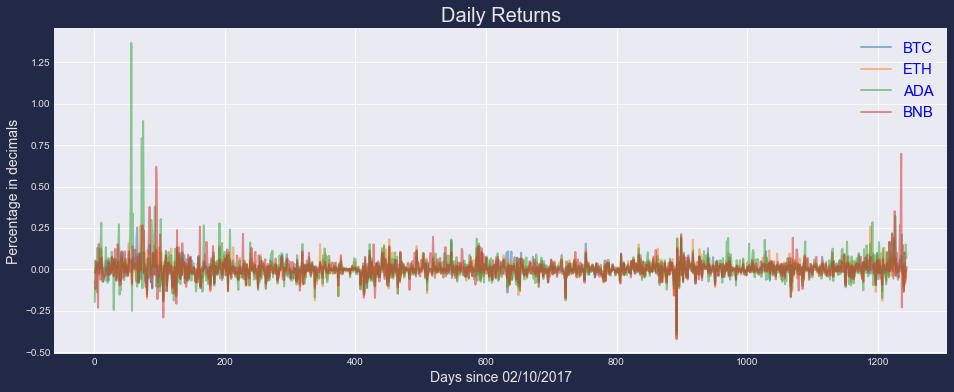

In [13]:
plt.figure(figsize=(16, 6))

for c in DR.columns.values:
    plt.plot(DR.index, DR[c], label = c, lw = 2, alpha = 0.5)
plt.title('Daily Returns', fontsize = 20)
plt.ylabel('Percentage in decimals', fontsize = 14)
plt.xlabel('Days since 02/10/2017', fontsize = 14)
plt.legend(DR.columns.values, loc= 'upper right')
legend = plt.legend(prop={'size': 15})
plt.setp(legend.get_texts(), color='b')
plt.grid()
plt.show()

# plot of daily returns

#### from this graph we can see that Cardano (ADA) had high daily returns back towards the end of 2017 and Binance coin (BNB)
#### has had great daily returns recently in early 2021.

## Measuring the Volatility

In [14]:
DR.std()

# the standard deviation - Representing the price volatility

BTC    0.041683
ETH    0.051054
ADA    0.084608
BNB    0.066051
dtype: float64

In [15]:
# Out of these 4 coins, ADA is the most volatile over this time period, followed by BNB, ETH and finally BTC

## Average Daily Return of each coin

In [16]:
DR.mean()

# using the mean average to measure daily average return of these coins

BTC    0.002769
ETH    0.002609
ADA    0.006156
BNB    0.005866
dtype: float64

In [17]:
# The average daily return for BTC and ETH are very similar, ADA and BNB have considerably higher daily returns
# (however are also the riskiest - most volatile - of the 4 coins here)
# BTC and ETH seem to correlate very highly

## Correlation Between Coins

In [18]:
DR.corr()

# shows the correlation between these coins

,BTC,ETH,ADA,BNB
BTC,1.000000,0.728810,0.484997,0.567779
ETH,0.728810,1.000000,0.562284,0.546214
ADA,0.484997,0.562284,1.000000,0.397600
BNB,0.567779,0.546214,0.397600,1.000000


In [19]:
# we can see that BTC to ETH have high correlation (0.72)
# ADA still has a positive correlation with BTC but this relationship is much weaker than ETH to BTC

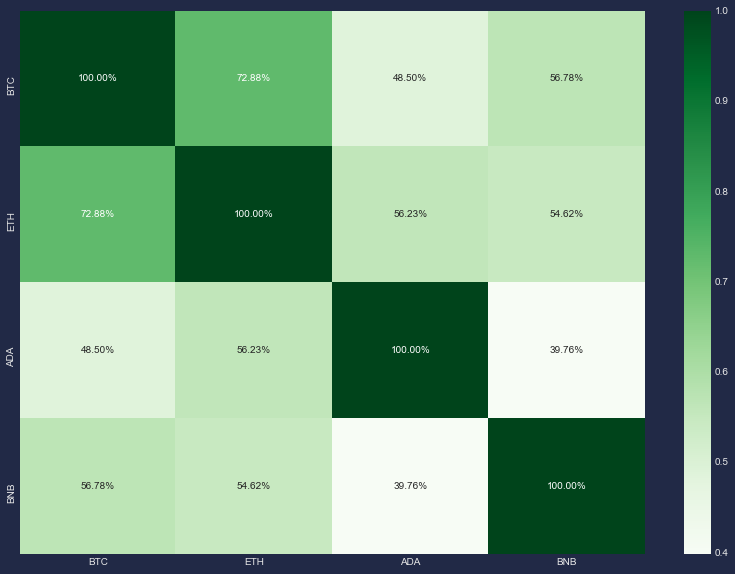

In [20]:
plt.subplots(figsize= (14, 10))
sns.heatmap(DR.corr(), annot= True, fmt= '0.2%', cmap="Greens")
plt.show()

# this visualises the correlation between the currencies
# (Darker green - higher correlation, white, lower correlation)

## Daily Cumulative Returns

In [21]:
DCR = (DR+1).cumprod()
DCR

# getting the cumulative product if you bought £1 of each of these coins three and a half years ago (02/10/2017)

,BTC,ETH,ADA,BNB
0,NaN,NaN,NaN,NaN
1,0.979171,0.983152,0.802713,0.926721
2,0.959186,0.983807,0.845738,0.815139
3,0.981650,0.994581,0.828662,0.854337
4,0.991266,1.037358,0.714918,0.804161
...,...,...,...,...
1240,11.073006,5.278440,36.816154,117.574075
1241,11.272789,5.467941,40.554710,129.466597
1242,10.680526,4.960765,41.613625,119.045928
1243,10.509503,4.861026,47.860364,112.833420


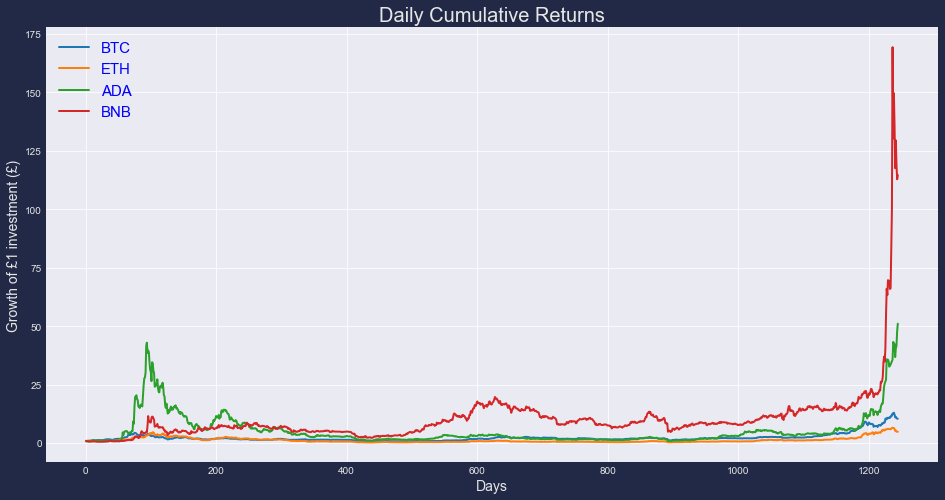

In [22]:
plt.figure(figsize=(16, 8))data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA7EAAAH0CAYAAADrKaqvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAADNNUlEQVR4nOzddXzV1R/H8dfNddAh3Y2AtIAIYqFgKyKC7U8xsLtFbEQsDCxESsQiRboEJaQ7RsN6u/n9/XG3Oy7bYGO7G9vez8djD+795uduh+1+7jnnc0x1m/YxEBERERERESkBzMUdgIiIiIiIiEheKYkVERERERGREkNJrIiIiIiIiJQYSmJFRERERESkxFASKyIiIiIiIiWGklgREREREREpMazFHYCIiBSN2wb15/Zb+wds83q9OBwujhw9zqp/NzJ+0gx279lfoPssmjOWLVt3M/ju5wF45vE7uOzi8xl81/Ns2ba7QNc+WY1zqtCv7wV0at+SqlUqYDKZ2b13P3PnrWDiT7NIT3cW6v2CpWqVikwe9zbzF63iqec/OKNrVCgfQ8f2Lfl9xkL/tknfv01kZDiX9PtfYYWaZzm1t0zp6Q7iE5JYs3YLY7+fxq7dZ97m7DYbV/fvxfiJ08/4GiIiUrIoiRURKWPmL1rFlq2+ZNJsNhERHkaD+jXp1/cCLu7dmWdf/ogly1af8fW/+Hoqx44lFFa4uep/RU8e/N8ALBYLy1euY/nKdYTY7bRp3YR77riOi3t34f5hbxCfkBT0WIpbbGwUP4x9g5X/bghIYidMnondbivGyALbW6bY2Chat2xEn96d6dKpNXfc9xJ79h48o+t/+N6T1KpZTUmsiEgZoiRWRKSMWbBoVUCik6lzh1a8/tJQXn7uXgbf9Tz74g6d0fW//GZqASM8vT69O/PYQ7eyZ+8BHn92ZEDvsdls4q7bruWWmy7nzVcf4q6hrwQ9nuIWGhJCRERYtu0TpswshmgC5dbeTCYTTz16G5df0o3bBvXnpdc/PaPrly8XU9AQRUSkhNGcWBERAWDJ8jWMGTuF8LBQhtxyZXGHk6vIiHCGDb0Fp9PFw0+8nW34s9dr8MnnE1mzbgvNm9WnY/uWxRSpnIphGHz17c8AnNe2WTFHIyIiJYmSWBER8Zs8dQ4Oh5Me3c7DYs76E2GxWLju6ov4bNRzzPj5I/6a/jmTx73NYw/dSmxMVMA1Fs0Zy9hPX871Hj9+M4I5v31KeFhotn1DbrmSRXPGnjKp6dnjPKIiw5k5Zwn7DxzJ9biPx0zgrfe+ZueufYBv3umiOWMZ/vID2Y69bVB/Fs0ZS7eubf3bJn3/Nu+/+Rj16tbgneGPMOvXT/htyigee/hWQkLsVKwYy8vP3suMnz/i10kf8PxTdxETHek/v03rJiyaM5YH/zcg2/2eefwOFs0ZS8P6tXKNH6BK5Qo8+uAgJnz7Jn/+MYZZv37CFx+/SP++Pf3HXHbx+Uwe9zYA3bu2ZdGcsVx28fn+1zD9548AuKDbeSyaM5a7b78m231sNivTf/6I7758LWB7/749+fKTF/nz98/4Y+poRrzyIA0bnDrm/Dgen5hx/+xDnnt2b88nHzzDrF8/Yea0jxn51uO0PbeJf3/mz7Na1YpERYazaM5Ynnn8DgBGvfMki+aMJTIiPOCaObWBzJ9Fk8Z1+e7L1/jzjzF88sEzgO/7N+qdJ6ldqxojXn2IGT9/xKxfPubt1x+mQb2aAdcOCw3hgXtvYtxXw/nzjzH8OukDXn/xfho1rF043ywREfFTEisiIn4Oh5NNW3YRHhYakKy89Ow9PHTfzbg9bqb9No+ff/0Lp9NF/yt68vbrD+frHtNnLSY0NITu57fNtq9Pr84cPnKclf9syPX8Tu1bAbD873WnvM+adVuY+utcDh46lq/4TlS9WiU+GfkMZrOJqdPmcuxYAv379uTZJ+7kk5HPUrVKRab9No+9cQe5uHcXnnhkyBnf62RVq1Tki49f4NI+XVm3fisTJs1g3oKV1KlVjccevpVr+vUCYMvW3UyY7Bs2vGv3fr74emq2OagAi5b+S2JSCr0u6JhtX6cOrXwfDMxe4t/27BN38tjDt2KzWpn6y1zmzltB61aN+fSDZ2l7btNCeY2ZP8utJxX8umPwVbz6wn1UKB/LHzMW8sfMRdStcw7vv/k4fXp3BiA5OZUvvp5KUnIqDqeLL76eyvxFq844ljdffYh9+w7x8y9zA9pflcrl+WTkM5SLjWLab/NYtXoTnTu2ZtQ7TwR8EPPK8//jhmsvZs++g0yYPJMly9fQqUMrPnrvaWrVqHrGcYmISHaaEysiIgEOHzkOQIUKsQA0b1qfnt3bM2P2Yl4e/pn/OIvZzJefvkTTJvWoWaNKngvzTJ+1iNsG9aP3hZ2YPmuxf3uTxnWpVbMa3//4O4Zh5Hp+pUrlANi990B+X1q+nVO9MhMmz2TkR+MA+Pr7X5j643tc2KM9c/5azvOv+Ho5zWYT474aTo/z2xESYsfhKHhV5FtuupxysdE8+Nib/L1qvX/75Kmz+fyjF7ioVycm/zyHLdt28+PkmVx/TR927dmf65xkl8vNX/P/5srLe9CkUR02bt7p39e7Z0e8Xi8z5ywFfL2gl/bpyszZS3h1xBg8Xi8A3/7wK198/CLPPXkn1w18DLfbk+/XZTKZiI6K4Ly2zXj4/oEA/mHFAE0b1+XWm69g1b8bePTp9/zfyy+++YnPRj3H4w8NZvmKdcQnJPHlN1O57OLziYwML/Bc7LXrtvDMSx9m235O9cpMnjqbd0d959/2+MOD6df3Anr2aM9v0xdQt845dO7Ymj9mLuTVEZ/7j1u09F9ee+F+rrisB6M/+7FA8YmISBb1xIqISACXyw1ARLivUNChw8d4dcQYPh/7U8BxHq+XNWs3A1AuNjrP199/4Ahr1m2hfdtmAUORL87oYTsxsc1JVKRviGhqanqe71kQ4yfN8D9OTkn1D0/+8YTtXq/Bpi27AKhapUKh3HfG7MW8/tYXAQkswIZNO0hPd+Tre37iNYGA3tiQEDtdOrVm7X9bOXDQNzy776XdARj50Th/Agu+n91P0/6kcqXytG/XIk/3zByum/m1cPZX/P7Th7z83P/weL289PqnAT2ffS/tjtlsZvSnPwZ8GJCYmML3P/5OWFgIF17QId+v/XTmzl+R677vxv8e8HzJ8jUA1MzoYTWbTQDUqVWdqKgI/3ELFq7i2psf5ePPJxR2uCIiZZp6YkVEJEB4uG+IZGqaL0k8fOQ4f8xchMVsplHD2tSqUZVzqlemUYPa/rmrZnP+PhOdPmsR57ZqzIUXdGDKz3Mwm030uqAjW7buZvuOvac8NyExGSAgWQgWl8vNwUNHA7alZaw9G3fgcMB2p9MF+NYtLQxr1m1hzbotREVF0LB+LWqcU5laNavRvGl97HZbvr/nAP+u2cSBg0e48IL2/p7B8zufS3hYaMBQ4saNauNwOLk6Y8jyiWrXqgZAw/q18rQU04lL7MTGRNKrZ0diY6L4bvxvfPbF5IAkGaBxxhzSC7qdR5dO5wbsq5zRC3+6ucRnYv/BnOdXOxxODh0OHJKekpIKgN3mexu1bfte1v63hZbNGzJ1/Lv8s3ojS5evZeGSf085b1tERM6MklgREQlQrUpFAOL2ZyVp/fpewJBb+lGpoi+JSExK4b8N29i1ez/Nm9XHZDLl6x5z/lrOQ/fdTO+eHZny8xzat2tBhfIxjJvwx2nPjdt/mJbNG1KjemU2btqR63E2m5WKFWILlESkn2JYsMvpPuPr5kVUZDgP/G8AF13YCZvNitfrZf+BI6z6dwONG9bO9/c806w5S7llQF+aN6vPf+u30atnR1wuN3/OXx5wb6vVyu239s/1OtHRefsQ4eQldr785mdGv/cUA2+8nISE5Gw/88iMnvZbBvTN/d5B+ADD6XDlvN2V/eecOdr9xJ/Bw4+/zc03XkafXp3p3LE1nTu25uGhA1mxch1vvDPW38stIiIFpyRWRET8oiLDqVunOolJKf5hsz27t+fxhwezZdtu3h75DZu37PL3TD364CCaN6uf7/ukpqazYPE/9LqgAxUrxnJhj/a4PR5mzVly2nOXrljLxb270OG8FsyeuyzX487v3IZXX7iP6bMW88obn/nn2eaU+oWG2vP9Gk7HP683hxuGhJz+fs8/dTddOrXmp2l/Mn3WYrbv2OvvHe/Tq/MZxzV99mJuGdCXXj06sGPnPjp1aMWyFWtJTEzxH5Oa5iA1NYFrBjxyxvfJTXxCEk+/OIovP36Re++8jm079rJsxVr//rQ0B26PhwsvvQuPJ/9zbn0yftYnfe+D8XPOlJbu4POxP/H52J+oWaMKHdq1oE/vzrRv14KXn7uXu+4v/esVi4gUFc2JFRERv359e2K1Wvnzr+V4vb5E4KJenQB46bVPWLj4n4ChlbVrVQeyJwt5MX3WIsxmM+d3bkPnjq35e+V6jh5LOO15i5b8S0JiMhdd2Inq1SrleIzJZOLaq3oDsGKlr4qx2+3rUQvLYWmfc6pVzv8LOA3Xqe5X/dT3i4wIp0un1mzYuJ23R37DuvVb/Qls1SoVCQmxB3zPT1UI62Q7d8Wxecsuzu/ShvM7tyHEbmPmSR8ebNu+h8qVylG+XEy287t0as2dQ67OtsRMfuzavZ/PvpyM2Wzm6UdvIyIiLOveO/ZgtVholMNSPs2b1eeeO66jdctG/m05vfbMed0nf+9P930/Uw3q1eS+u26geVPfBzp79h5k8s9zuPfB19i99wDNm9bHarUE5d4iImWRklgREQGg7blNGXLLlaSmpvHNuF/92zPnepY7KaG55KIu/nU7rZb8v0Ff/vc6jhyNZ+CNl1OhfIy/6NDppKSk8dkXk7HbbbwzfFi25UvsNhvDhg7k3FaN2bRlJ7MyKu4ej08kMTGZZk3qEhubVVCqYYNadO7UOt/xn86+fYdwezy0O7dpQM9r546tadKozinPdbndeDxeoqIiApIfu93GsAd8FX1P/J5n9lja8pgozZizhHOqV2bA9ZeSkpLGgsX/BOz/fcZCzGYzwx4YGHD/CuVjePTBQdxyU1/S0gpWWGvClFms37idihXLce8d1wXcG+CB/w3wz88GCA8L5bEHb+WWmy4PmA/s9niytb9de/YDvoQ7k91mY8D1lxYo5tzYbFYG3HApgwdeGbA9IjyMqMhwjhyNP6NKziIikjMNJxYRKWO6dW1L1Yx5ryaTr9evUcPanNuqMenpDp5/9ZOAYkYzZi/hogs7Mfylocyeu4yU1DSaNq5H23ObcOx4AuXLxRAdHZnvOLxeg5lzljDg+ktJTU1j3sKVeT536q9zqVgxliG39OPbL19j+Yp17NwVR3S0b+mWqlUqsnNXHE8+94G/cJDXa/Dr9AUMuP5SPh/9AnPnr6BcbBQ9u7dnw8btnNuqcb5fw6nEJySxYNEqenZvz+ejn2fxstVUr1aZbl3asHrtJlq3zP1+DoeTeQtXcmGP9nw++gWWr1xHWGgIXTufS4XyMSQmJhMZGY7JZMIwDOITknA4XbQ9tylD772ReQtWsmbdllyvP2vOEv535/U0bFCL32cs9H9Qken3GQs5v0sbenZvT/26NVi2Yh0Wi5kLL+hAbEwUH42ZwL79h3O5et4YhsGb747l849foF/fC5gxezFr/9vKqn83MmHKTK6/ug/fffEaS5atwely0b1rO6pWqcBP0/7kn9Ub/dc5cuQ4tWpU5fmn7mL53+uYPmsxv/2xgKv79eKh+26mRbP6xCck061LG5JT0vw92oVpw6YdzJ2/gp7d2/PVJy+x8t8NWC0WunVtS7nYaF5/64tCv6eISFmmJFZEpIzp3rUt3bu29T9PS3Nw4OARJv00mwmTZ2RLTpYsW83zr3zkK1rTuzOOdCdx+w/7h7mO/fRlOndsfcr5qbn586/lDLj+UuYtXJnvtVU/H/sTS5at4ep+vWjauC7ntm6MCRO7dscx+ec5TPppdrbk7JPPJ5Ge7uDSPudzbf/e7N13kHdHfUdiUkqhJ7EAr7/1BUeOxNOzR3uuu+oitu/YyzMvfcg51SqfMokFGP72Fxw+fIzu57fj2v69OXI0no2bdvDND7/R58JO3HDtxbQ9twkr/9mA2+3h3Q++5Y7BV3HVlb1ITk47ZRJ79FgCK/9ZT4fzWmQbSpzp2Zc+5Op+vbj84m5ccVl3HE4XO3buY/ykGSxYtKpA35dMW7btZsLkmQy4/lIef3gwg+9+AY/Hw8jR49iwaQdXX3khF/fugsfjYffeA3zx9U/8MXNRwDU++mwCTz92Oz27t6d8uWimz1rM1u17eOypd7nt1v5c2KMDKalpzF+4io/HTGTSuLcLJfaTvTz8MzZu2kmfXp3od3kPDAM2bdnJu6O+ZdGSf4NyTxGRsspUt2mfvE+kERERKURXXt6DJ4YN4YFHRwSsFSoiIiKSG82JFRGRYhEREcb11/Rh776DSmBFREQkzzScWEREitS5rRrz4P8GUK1aJaIiw3l5+GfFHZKIiIiUIOqJFRGRInXkaDzly8fg9XoZ89WUPFclFhEREQHNiRUREREREZESpMQOJ142b1Jxh3BKkZEhJCc7ijsMKWZqB5JJbUFA7UCyqC0IqB1IFrWF7Dr2uDbXfRpOHCTWPC44L6Wb2oFkUlsQUDuQLGoLAmoHkkVtIX+UxIqIiIiIiEiJoSRWRERERERESowinRPbrEk97r3zeoY+8gYvPXsv5cvFAFCtakX+27CNF179mIfuu5mWLRqSmpoOwJPPjyQlJa0owxQREREREZGzVJElsQNuuJRLenchPd0JwAuvfgxAVGQ4o955kg8+GgdAo4a1GfbE2yQkJhdVaCIiIiIiIlJCFNlw4ri4wzz94ofZtt9+61VMmjqbo8cSMJlM1KxRhSeGDebjkc9w+SXdiio8ERERERERKQGKrCf2rwV/U7VKxYBtsbFRnNe2GR987OuFDQsNYdJPsxk/aQYWs5lR7zzBxs072LZ9b7brRUaGnNVVvCwWM7Gx4cUdhhQztQPJpLYgoHYgWdQWBNQOJIvaQv4U6zqxPbu3Z+acpXi9BgDpDgcTp8zC4fANOV757wYa1KuVYxJ7tq+jFBsbTnx8anGHIcVM7UAyqS0IqB1IFrUFAbUDyaK2kD/FWp24fdtmLF2xxv+8Zo2qfDTyacxmExaLhVYtGrJ5y87iC1BERERERETOKsXaE1urZjXi4g77n+/avZ+Zc5bw2ajncHs8TJ+5mB274ooxQhERERERETmbmOo27WMUdxBnYtm8ScUdwilpSICA2oFkUVsQUDuQLGoLAmoHkkVtIbuOPa7NdV+xDicWERERERERyQ8lsSIiIiIiIlJiKIkVERERERGREqNYCztJ7tq1i2DPnqzPGEJCDOrW9XLPPU4GDHAzdGgoP/5oy/X8mjW9rFyZAoBhwHff2Rg3zsbmzWasVmjRwsMDDzjp0cMT9NciIiIiIiJSWJTEnsWGDnVw110uAFJT4a+/rDzySCiVKqXx2mvpPPusb63cuDgTF18cwTffpNKmjRcAi8V3Da8XBg8O5e+/LTz+uJPzz3fjdpv48UcbN9wQxujR6VxzjbtYXp+IiIiIiEh+KYk9i0VEQJUqWcWj69Z18ccfViZMsHHRRR6io337HL5cltjYwOMBvvjCxuzZVmbNSqV5c2/GVoMXXnCQkgLPPBPCJZe4iYgoghckIiIiIiJSQEpiS5jwcAOTKe/Hf/ONjUsucZ+QwGZ59FEnN97oIjS0EAMUEREREREJojKTxD40ZR2Ldhwrlnt3rVue969uUaBrGAbMn2/hr7+sjB2blqdz0tNh0yYLN97oynF/5coGlSuXyGWCRURERETkNDxx+0h+7y3CB9+OrXnL4g6n0JSZJLYkevddOx98YAfA6QS328Rll7no3DlvxZgSEnxdtjExQQtRRERERETOUkmvvIB73RoSli6m4oLlxR1OoSkzSWxBe0LzKzY2nPj41AJdY8gQF0OGOAFwOk1s2mTmpZdCGDw4jB9+OH1vbLlyBiaTwfHj+Rh/LCIiIiIipYL3ePGMRA02rRN7FitXzqBePd9XkyZe+vVz8/TTDubMsbJx4+l/dHY7tGrlZeXKnI/dvt3EddeF5elaIiIiIiJSwuSnmE4JouylhDEyprB6s9dpytGAAS5mzrTy33/Zf9SjR9v55x8LNWvm8WIiIiIiIiLFrMwMJy6JUlLg4EHfpyeGAZs2mXnzzRBatPDQtGneEs9Bg3zL8lx7bRhPP+2ka1c3yckmvvnGxvff2/j003QtryMiIiIiIiWGktiz2KhRIYwaFQKAxWJQsaJBnz5uHn3UmeeRARYLfP99Gp9+auOLL2w8/3wIISEGLVt6mTIljS5d8lYkSkREREREShZTKR1OrCT2LLVyZUqej61Vy+DQoaRc99tscP/9Lu6/P+eldkREREREpBQqpUms5sSKiIiIiIiURkpiRURERERERIqXklgREREREZFSST2xIiIiIiIiIsVKSayIiIiIiEhpVDo7YpXEioiIiIiIlEoq7CQiIiIiIiIlhpJYERERERERKTmUxIqIiIiIiEhJUTpzWKzFHYDkrF27CPbsyfkzhiZNPJQvb7B4ce4/vi5d3Eydmkb//mHUrevlvfcc2Y655powqlc3GDUqvdDiFhERERERCSYlsWexoUMd3HWXK9t2m83AZAKn0/fRyooVFm67LYw5c1KoXNkAwG43ijRWERERERE5y5TSObFKYs9iERFQpcqpklHfvnLlfP9WqGCc5ngRERERESkzSmkSqzmxIiIiIiIipVLpTGLLTE9s9K+DCNn1Z5Hes1LGv47aF5LY95sivbeIiIiIiJRxpbQntswksSXRu+/a+eADe7btL7/sYNCg7HNlc/PjjzZ++smWbbvDAdde6y5QjCIiIiIicnYqpTls2Ulii7onNDY2nPj41AJdY8gQF0OGOLNtr1gxf/NeL7vMzdNPZ69OPHRo2BnHJiIiIiIiUhzKTBJbEpUrZ1CvXsELNUVF5Xyd0FAVgRIRERERKbVKaVesCjuJiIiIiIiURqU0iVVP7FksJQUOHsy54VWubJTWNikiIiIiIoWidCYMSmLPYqNGhTBqVEiO+zZsSKZCBQ0HFhERERGRXJTSXi8lsWeplStT8nxs164eDh1KynHf1KlpuZ43eXLu+0REREREpIQrnTms5sSKiIiIiIhIyaEkVkREREREpDQqpcOJlcSKiIiIiIiUSkpiRUREREREpKRQT6yIiIiIiIiUGKUzh1USKyIiIiIiUiqpJ1ZERERERESkeCmJFRERERERKZXUEysiIiIiIiIlhYYTi4iIiIiISElhUhIrxeXgQRPVqkVy/vnh2fa1axdB5cpR/q8aNSI577wIXnghhOTknK83bZqVypWjePzxkCBHLiIiIiIixaZ05rBKYkuCiROt1KljsHmzhaVLLdn2Dx3qYO3aZNauTWbBghSefdbB1KlWbrghHKcz+/XGj7dRv76XyZNtpKQUwQsQEREREREpJEpiS4AJE2z06+eiZUsP33xjy7Y/IgKqVDGoUsWgbl2D/v3dfPttGn//bWbcuMDjDx40MXeuhaefdpCWBlOnZr+eiIiIiIiUBqWzK1ZJ7Fnun3/MbNxooUcPD337uvn1Vyvx8ac/r1UrLx07epg61RqwfeJEKyEhcNFFbrp08fDtt0piRURERERKpVI6J9Z6+kNKh6dWPMKyw0uK5d4dK3VmePt3zujc8eNtVKrkS0irVPEyfHgIEybYuOsu12nPbdrUm62ndcIEG716uQkNhX793DzySCjr1plp0cJ7RvGJiIiIiMhZqpQmsUXaE9usST1GvfMkAI0a1mbqj+8x6p0nGfXOk/S6oAMAV1zWgy8+eoHPRj1Hl06tizK8s47T6Rvu27evG7MZ6tUzaNUq772nsbEGSUlZzzN7dfv1cwPQt68Lm81Qb6yIiIiISGlUSpPYIuuJHXDDpVzSuwvp6b5KQ40b1mb8pBmMnzjdf0z5cjFcd1Vvbv/fS9jtNj5+/2lWrPwPl8td4PufaU/omYqNDSc+PrVA15g+3crx4yauvDLr9ffr5+aVV0JYutRCp06eU56flGQiJsbwPx8/3kZ4uEHv3r7rlSsH3bt7mDTJxgsvOAjPXvxYRERERETkrFJkSWxc3GGefvFDnn/yLgAaN6xDrZpV6dalDXv2HeSD0eNo1qQua//bisvlxuVyszfuEPXr1WTjph3ZrhcZGYLVmr1S79nCYjETG1uwrHDyZF9H+bXXhvm3GRk56Y8/hnLJJQZms4nQUBuxsdl/lOvXm2nb1pdQO53w889mUlNN1K8f6T/G6wXDMDFzZgSDBxvZriEFUxjtQEoHtQUBtQPJorYgoHYgWYLVFlJsFjInIZrnziD6qqsK/R7FociS2L8W/E3VKhX9z9dv3M4vv89j05ZdDBpwBUMG9WPLtt0kp2T1XqamphMZEZbT5UhOdgQ95oIoaE/swYO+xHLIECeDBwfOf33xxRAmT7bwwgspeL0RpKe7iI8PXEtn3TozS5aEM3JkOvHxbqZNs3LsWBgffJBG69ZZ81+9XrjuujA+/dSgf/+C9RxLdoXRIy+lg9qCgNqBZFFbEFA7kCzBagtuV9bIzUPPP4e358WFfo/iUGyFneYvXOVPWOcvWsnD9w9k9ZpNhIeF+o8JDw8lObls/seeONGKYcD99zupWTOwh/T++53MnRvOxIm+uawpKb6kFyAtDZYvt/DqqyF07uzhuut8Q4fHj7dRt66XG25wZxsaP2iQi3ffDeG//8w0b64CTyIiIiIipUIpnRNbbEvsvDviEZo2rgvAeW2asWnLTtZv3EHrlo2w22xERIRRp1Z1tu/YV1whFqsJE2z06ePOlsACdOvmoXnzrAJPo0aF0LJlJC1bRnLhhRGMHm1nyBAX48alYbFkrQ07ZIgzx3Z8220uQkJU4ElEREREpFQppUlssfXEvj3yG4YNHYjL5eHY8QRGvPsVqanpTPxpNh+9/xQms5nPvpyM03X6pWRKo/nzT90DPXdu3nuoq1Qx2L8/Odf9lSsb7NmT+34RERERESmBlMQW3IGDR7hr6CsAbN6yi3seeC3bMb/8Po9ffp9XlGGJiIiIiIiUQqUziS224cQiIiIiIiIi+aUkVkREREREpDQ6qSPWMErHkppKYkVEREREREqjk+fEut3FE0chUxIrIiIiIiJSCplOTmJLSdFcJbEiIiIiIiKl0UlJrOFRT6yIiIiIiIiUFBpOLCIiIiIiIiWFoeHEIiIiIiIictZSYScpSu3aRVC5cpT/q2bNSLp3D2fcOGvAMR06RJCamv38/v3DePjhEP/zE69VuXIUdepEctFF4cycaSmKlyMiIiIiIkVNSawUtaFDHaxdm8zatcnMn5/CkCEuHnkklFmzshLPnTvNvP56yCmukmX48HT/9WbPTqFPHzeDB4exbp2agYiIiIhIqXNyYSclsRJsERFQpYpBlSoGdesaDBniols3DxMm2PzH1K7t5fPPbSxffvofZXS04b9egwYGjz3mpHZtgylTrKc9V0REREREShjDCHyuJFaKQ3i4EfCByo03umjf3sPDD4eSnl7w64mIiIiISClxUhJbWnpiy0wXXMJjD+NauqjI7nfkhMe2Tl2Jeeu9Al3PMGD+fAt//WVl7Ng0/3aTCUaOTKdnzwjeesvOc88583Q9txumTbOyZYuZ0aNLR2MWEREREZETZOuJLR3VictMElsSvfuunQ8+sAPgdILbbeKyy1x07uwJOK5ePYPHHnPw2mshXHmlm9atvTleb9iwUB57zPfY4QCPx8Tttztp1Cjn40VEREREpPRQT2wJU9Ce0PyKjQ0nPj6HssH5MGSIiyFDfD2rTqeJTZvMvPRSCIMHh/HDD2kBx957r4tff7XxwAOhzJ6d832fesrBJZf4Gm56uonVq808/3woHg+8+aajQLGKiIiIiMhZppTOiS0zSWxJVK6cQb16mQ3PoEkTLy4X/O9/YWzcGDid2WKB999Pp3fvcN57z57j9SpVCrxes2ZeDhxw8sYbdp5/3kFkZPBei4iIiIiIFC2jlCaxKuxUwmS2Q28OI4CbNPHy8MNORo60s3Nn3n60p7qeiIiIiIiUYNkKO2lOrARZSgocPOgrHWwYsGmTmTffDKFFCw9Nm+acdT74oJPffrOybp0l277ERJP/el4v/POPhU8/tXPxxW6io4P3OkREREREpBic1BFbWnpilcSexUaNCmHUqBAALBaDihUN+vRx8+ijzlyXxbFafdWKL744PNu+p54K5amnMo8zqFbN4MYbXTzyiObDioiIiIiUPif3xHpyOa5kURJ7llq5MuWMj2nZ0ktcXHLAtkOHkgolLhERERERKSFOnhPrKh3DiTUnVkREREREpDQ6OYn1lI7hxEpiRURERERESqNshZ2UxIqIiIiIiEhJoeHEIiIiIiIictZST6yIiIiIiIiUGJoTKyIiIiIiIiXGyT2xLiWxIiIiIiIictY6qSdWw4lFRERERETkrHVSDqvhxCIiIiIiInLWMk4eTuzxFFMkhUtJrIiIiIiISGl0cmEnr7d44ihkSmJFRERERERKpZOrE6snVkRERERERM5W2ZbYURIrIiIiIiIiZ6uTclhDhZ1ERERERETkrGWcNAdWPbEiIiIiIiJy1tJwYhERERERESkxsg0nVnViEREREREROVupJ1ZERERERERKjpOTWBV2EhERERERkbPVST2xhnpiRURERERE5Kyl4cQiIiIiIiJSUpycwyqJFRERERERkbNXRhZrbdESANfKFTiXLSnOiAqFklgREREREZFSyZfEhlx4kX9L4qMPFlcwhUZJrIiIiIiISGmUOZ7Yai3eOAqZklgREREREZHSKCOJNVmUxIqIiIiIiMjZLrOwk3piRURERERE5Oyn4cQiIiIiIiJSUviHE1uKOZDCpSRWRERERESkNMqlsJORbQHZkkVJrIiIiIiISGmU25xYt7vIQylMRTo4ulmTetx75/UMfeQNGtavxcNDb8bjMXC5XLwyYgzHjyfy0H0307JFQ1JT0wF48vmRpKSkFWWYIiIiIiIipUDGcOKTe2JdTkw2W3EEVCiKLIkdcMOlXNK7C+npTgAevG8A7436ni3bdtOv7wUMvPEyRn08nkYNazPsibdJSEwuqtBERERERERKn8xhwyfPiXW6ILzowyksRTacOC7uME+/+KH/+QuvfsyWbbsBsFgsOJ0uTCYTNWtU4Ylhg/l45DNcfkm3ogpPRERERESkdDFy74ktyYqsJ/avBX9TtUpF//OjxxIAaNGsAdf068V9Dw8nLDSEST/NZvykGVjMZka98wQbN+9g2/a92a4XGRmC1Xr2VtmyWMzExpbgjzekUKgdSCa1BQG1A8mitiCgdiBZgtUWEswmPEBkbAQJJ2yPDrVgK8Ftr1gXDOp1QQcG3XwFjz3zHvEJSZjNJiZOmYXD4ftkYOW/G2hQr1aOSWxysqOow82X2Nhw4uNTizsMKWZqB5JJbUFA7UCyqC0IqB1IlmC1BY/HC0Bymidge8LRRKxRJbftFVt14j69O3NN/17cP+wN4vYfBqBmjap8NPJpzGYTFouFVi0asnnLzuIKUUREREREpOTKZTgxLlcxBFN4iqUn1mw28fB9N3Pw0DFef3EoAP+u2cgXX09l5pwlfDbqOdweD9NnLmbHrrjiCFFERERERKRk868TGzgN03BqTmyeHTh4hLuGvgLApVfdn+Mx4378g3E//lGUYYmIiIiIiJQ+mT2xlpN7Ykt2Eltsw4lFREREREQkmDJ7Yk+qTux2F0MshUdJrIiIiIiISGlk5LK9hA8nVhIrIiIiIiJSGmXOiTWZAjeX8MJOSmJFRERERERKo1ySWM2JFRERERERkbNQLj2xzpLdE5vn6sT16tagaeO6lIuNxuv1cux4Ahs372SnlsARERERERE5+/jnxJ48nLhk98SeMomNigzn6n696Nf3AiqUjyFu/2ESEpMxm83EREdStWpFDh06xrTf/uKnaXNJTkktqrhFRERERETkVPzDiU/aXsLnxOaaxF5xWXduuakvS1esZcS7Y1n17wZcrsBSzGGhIbRq2YjePTvy9ZhX+Pr7aUz7bV7QgxYREREREZHTyK2wUwmvTpxrEntOtcoMuecFUlLScj05Ld3BshVrWbZiLTHRkdx842VBCVJERERERETyxyilhZ1yTWI/+WJSvi6UkJjMR59NKHBAIiIiIiIiUhh8Sazp5Dmx6Y7iCKbQnLI6cbeubXnovptz3T9oQF9eePruQg9KRERERERECiizsNNJHbFGeu6jbUuCXJPYa/v35sWn787qgs7BgsX/0LXTucGIS0RERERERAoitzmxaSW7IG+uSewN117MKyPGMPKjcf5tA2+8nMiIcP/zurWrs3vP/uBGKCIiIiIiIvl3QhJrbdwka3NaejEFVDhyTWKjoyLYsnV3wLZBA/oSFZWVxF5xWQ+m/vpX0IITERERERGRM2R4ff+azMR88iWRz7zg21xae2L/XbOJu2+/lqioCMLDQ2l7bhOsVgtPDBvCE8OGUK9uDerXq8l/G7YVZbwiIiIiIiKSFyfMiTVZrZgrVfY9Ty/ZPbG5Vid+f/T3vPvGI/w2eRQABgYmTBw5epx0h4MXnr4bq9VC08Z12bFzX5EFLCIiIiIiInlw0pxYU5hvVG1J74nNNYndf+AIA4Y8TcMGtbDZrOzevZ8pP7zDl9/8TNz+w5hMJp4YNpjePTvy+4yFRRmziIiIiIiInNbJSWyob2sJnxObaxJrtVpwuz1s3rLLv+2iK+71PzYMgxHvjg2oXpx5joiIiIiIiBQzI3CNHVNomG9zCe+JzXVO7OejX+CKy7pjtVpyPTkzgQ0NtXPVlRfy+UcvFH6EIiIiIiIikn/+HDZwOLH30EFSvxpTTEEVXK49sQ88NoJ777ie/915PStWrWfFyv/YtTuO+IRkzGYTMdGRNKhXk9YtG9GhfUvmL1zJQ4+/VZSxi4iIiIiISG78c2Iz/skYTgzgWrumGAIqHLkmsYmJKYx49yu++vZnrry8B/0u70HDBrUwm32dtx6Ply3bdrN0+RpGfzaBg4eOFlnQIiIiIiIicmrGSXNisYf491mqVy+GiApHrklspkOHj/H52J/4fOxPmEy+HljDMEhITC6K+ERERERERORMZPTEmjLnxGYms5C13E4JdNok9kSGYRCfkBSsWERERERERKSwnLTEzonMlaoUcTCFJ9fCTiIiIiIiIlKCnVTYCcBcrRoAtnbtiyGgwpGvnlgREREREREpKQILOwHEfvk9RmIClioltydWSayIiIiIiEhpdNI6sQDmyEiIjCyeeApJnoYTT/j2TaKiIrJtr1ghll8nfVDoQYmIiIiIiEgBnWJObEmWa0/shT3a06XTuQBUq1qRxx66FafTFXBM1SoVcHs8QQ1QREREREREzkApTWJz7Yld9e9GPB4PXq8X8FUm9nq9/i+Px8PWbXt48rmRRRasiIiIiIiI5FMpS2Jz7YmNT0hi+NtfArD/wBF+mPgH6enOIgtMRERERERECsA/J7Z0yVNhp6++/ZnIiHBataiN1WohoLwVsOrfDcGITURERERERM5UKR1OnKck9tI+XXnkgUGEhNiy7TMM6N7ntkIPTERERERERAqgLCexgwb05dc/5vPZl5NJTUsPdkwiIiIiIiJSWEpZEpunJXYqVizHpKmzlcCKiIiIiIiUAMYJ82FNZTGJXbj4H87v0ibYsYiIiIiIiEhhKKVFnSCPw4nj45O467Zr6H1BB/btP4zL5Q7Y/+qIMUEJTkRERERERM5AKZ0PC3lMYiMiwpj959JgxyIiIiIiIiKFoawnsa+/9UWw4xAREREREZHCVlaTWIDOHVtzwzUXUeOcqtz38HCuvKwHBw8fZdpv84IZn4iIiIiIiORXKZ4Tm6fCTn16d+b5J+9k9drNlIuNwmIxc/R4AkPvvYkbrukT7BhFREREREQkP0rxcOI8JbEDb7iMN9/7mq++nYbX6wVgys9zeO3Nz7n2qouCGqCIiIiIiIjkU1lPYs+pXpmNm3dk275l624qlI8p9KBERERERESkIMp4Erttx166dGztf565cG7fS7uxdfue4EQmIiIiIiIiZ8Y/Jbb0JbF5Kuz04Sfjeeu1h2nXthlWq5Uht/SjZo2qNKxfi8effS/YMYqIiIiIiEh++IcTF28YwZCnJHbNui3cNPgpru53IR6Pl8jIcFav3cyLr33MwUPHgh2jiIiIiIiI5EcpnhOb5yV2jh1P4POxPwUzFhERERERESkERimeE5unJLZWjarceds11K5ZFZvdlm3/Tbc+WeiBiYiIiIiIyBnK6Ik1lcLxxHlKYl989h68Hi+//rEAh9MZ7JhERERERESkIDILO5Xdnthq3HHfS+zcFRfseERERERERKSgSnFhpzwtsbNsxVpaNGsQ7FhERERERESkUJTxObEffDyOrz59mYt7d+bAwaN4vd6A/cPf/jIowYmIiIiIiMgZMPzjiYs1jGDIUxL72MODMQyDhMRkzGYzZnOeOnCzadakHvfeeT1DH3mDc6pX5pnH7wAMtu/YxzsffIthGFxxWQ/6970Aj8fL2O+nsXjp6jO6l4iIiIiISJnlzUhizWU0iW3TqjH3PvQ6m7fsOuMbDbjhUi7p3YX0dF9hqAfuvYkxX03hn9UbeeyhW+nWpQ3r1m/juqt6c/v/XsJut/Hx+0+zYuV/uFzuM76viIiIiIhImVPW14ndvnMfUZHhBbpRXNxhnn7xQ55/8i4AGjeqwz+rNwKwZPkaOpzXAq/Xy9r/tuJyuXG53OyNO0T9ejXZuGlHtutFRoZgtVoKFFMwWSxmYmML9j2Tkk/tQDKpLQioHUgWtQUBtQPJEoy24PakcQwwmUtfO8tTEjvtt3k8/+Rd/DFzEXEHDuPxBM6J/W36gtNe468Ff1O1SkX/8xM/D0hNTScyIozwiDCSU1Kzbc9JcrIjL6EXm9jYcOLjU09/oJRqageSSW1BQO1AsqgtCKgdSJZgtAVvfAoAhslU6tpZnpLYQQP64nS56dWzY7Z9hmHkKYk9mdc/0RjCw0NJTk4lNSWN8LDQbNtFREREREQk7wyPBwCTJU8pX4mSp1d03cDHct0XGxN1RjfevHU3bVo34Z/VG+ncoRWr/t3A+o07uOu2a7DbbNjsVurUqs72HfvO6PoiIiIiIiJlljujrpDl7J2CeabylMTOn/klV173IPEJSQHbq1apyLdfvMpFfe/J940//OQHnhg2BJvNys5dccydvwKv12DiT7P56P2nMJnNfPblZJwuV76vLSIiIiIiUqZl9MRiLUM9sZf26UrfS7sDvoJWI159ELfbE3BMhfIxHDkan+ebHTh4hLuGvgLAnr0HuX/YG9mO+eX3efzy+7w8X1NEREREREQCZQ0nLkM9sXPnr6BqlQqAiVYtGrJm7RZS09JPOMIgNc3BX/P/Dn6UIiIiIiIikndlcThxerqTr76dBvh6UGfPXab1WkVEREREREqCzOHEpTCJNefloBmzF3PJRV2pUrk8AENuuZLvvniNZ5+4g4hclsARERERERGR4uEfTlwK58TmKYm9987ruXPI1URHR9K5QytuvflKZs5ZSvVqlXn4/puDHaOIiIiIiIjkR1nvie3TqzPPvvQhW7buplfPjvy96j++GfcLb4/8hq6d2wQ7RhEREREREcmPUjwnNk9JbHh4KAcPHcNkMtGpQ0sWL1sDkK1asYiIiIiIiBQ/w+NLYk2W0jecOE+vaNPmnQwa0Jf4hCSioiJYsGgVlSqW4547ruW/9VuDHaOIiIiIiIjkR1kfTvzOB9/SvGl9runfm/dGfcfhI8cZcP2lVKlUnndHfRfsGEVERERERCQ//ElsGe2J3bFzH4Pvfj5g20djJmjJHRERERERkbOQkTEn1mQtfT2xeU7L69erwbX9L6LGOVV4afgn9Ojajr1xh1i2Ym0w4xMREREREZH8KsU9sXkaTtzhvBZ8+sFzmM0mmjeth91mIzY2ihGvPMhFF3YKdowiIiIiIiKSH6V4Tmye0vK7b7uGDz4ex7Tf5nFhj/YAfPH1VI4eTWDwwCuZ9efSoAYpIiIiIiIieecfTlwKk9g89cTWrlWdFSv/y7Z9xcp1VKtasdCDEhERERERkQIoxT2xeUpi9x84TItmDbJt79q5DXH7Dxd6UCIiIiIiIlIAmUmstfTNic3TK/rsqyk898SdNG1cF4vFwuUXd6N6tUr07NGel17/NNgxioiIiIiISD4YnjI+nHjBolX876HXiY6OZPuOvXTp1Bqzxcz/HnqdufNXBDtGERERERERyY9SPJw4Tz2xnTq0ZPnf63h1xJhgxyMiIiIiIiIFlVHYqcwmsS88fQ8ej4d5C1cy+89l/LN6Y7DjEhERERERkTNkZPTEmsrqnNi+1zxAx/Yt6Nm9Pa+/eD9Op4s/569g9txl/Ld+W7BjFBERERERkfzwDycuo0msx+Nh8dLVLF66GovFQod2zenWtS3vDn+ExKQUrhv4WLDjFBERERERkbzylN7hxHkq7HSipo3r0q5tM9qe2wSP18vfq9YHIy4RERERERE5Q2V+OHHbc5tyQffz6N61LRHhoSxc/C+jPhnP0uVr8WR2U4uIiIiIiMjZwV3GqxO//frDLF2xlg8+GsfCJf/idLqCHZeIiIiIiIicqbK+xE7fax8gNTU92LGIiIiIiIhIITAy5sSaymoS63K56df3Apo2rovVagFMAfu1fqyIiIiIiMhZJLMntqzOiX1i2BAu6HYey1asJSU1DTCCHJaIiIiIiIicsVJcnThPSWznjq144bWPWbTk3yCHIyIiIiIiIgVluEvvcOI8LbHjcDiJizsU7FhERERERESkMPgLO5W+4cR5SmK/+nYaD943gDq1q2O32TCZTAFfIiIiIiIichYp63Nih9xyJeXLxfDNmFdz3N+9z22FGpSIiIiIiIicOSMjiS2Nw4nzlMS+PPyzYMchIiIiIiIihcVdxgs7/btmU7DjEBERERERkcJSFocTTx73DkPueZ7ExBSm/PAOxilW1blmwCPBiE1ERERERETOQJkcTvz52CmkpTkAGPPVlCILSERERERERArIX524DCWxf8xclONjEREREREROcuV4jmxeVpiR0REREREREoOw+NLYk2lcE6sklgREREREZHSphQPJ1YSKyIiIiIiUtr4hxOrJ1ZERERERETOcqW5OrGSWBERERERkdKmLK4Te/kl3fJ8kd+mLyiUYERERERERKQQlOI5sbkmsb0u6MB5bZuTnJJKSkparhcwDENJrIiIiIiIyFnEyJgTWxqHE+eaxA578h0evn8gXTq15rZ7XyQpKaUo4xIREREREZEzVYqHE59yTux7H37H/gOHufeO64oqHhERERERESmosjicONPLwz+jYYPaRRGLiIiIiIiIFILSXJ34tEnskaPxHDkaXwShiIiIiIiISKHwrxNb+pLYUw4nrlSxHL16dsx1/yUXdeH6q/sUelAiIiIiIiJSAGVxTmzbc5sy7qvXueGa3JPU/QeOMOjmvkEJTERERERERM6M4cmsTlyGktj777mB8ZNmcNf9r/i3tWzeAJst65tgNptJS3MEN0IRERERERHJn7I4nLhmjar8MXNRwLZ3hj9CpYrl/M8vv6Sb1ogVERERERE5ixiGUTarE+/cFceFPTrw3fjfALDbbZjMJvpe2p0dO/cxb8FK2rdrzviJ08/45pddfD6X9jkfgBC7jQYNanHPA6/y5qsPsWfvQQCm/vInc/5afsb3EBERERERKVO8Xt+/ZjMm8ynLIJVIuSaxn3w+kbdeH0afXp1wezzUqVUdq9XKBd3Oo0un1tx+a38wDCpVLMfW7XvO6Oa/z1jI7zMWAjDsgVv4dfp8GjeszfhJMwqUHIuIiIiIiJRZpbgXFk6RxK78ZwMDb3uabl3bYrdZ2bErjhefvodHn36XuP2HqVqlIi8/dy8DbriMJcvXFCiIJo3qULf2Obz7wbc8+uAgatWsSrcubdiz7yAfjB5Halp6ga4vIiIiIiJSZpTi+bAAprpN+xh5PbhVi4Zs2LQDl8v3TYmOjiDEbufwkeMFCuL1F+9n0tTZrPp3I5ddfD7btu9h05ZdDBpwBVFR4Yz+9Mds5/y38hes1rP3h2KxmPF4vMUdhhQztQPJpLYgoHYgWdQWBNQOJEthtwVPYiI7unbBHBVFvcVLCu26Ralx68ty3Zevestr1m0JeJ6YmAKknFFQmSIjwqlVqxqr/t0IwPyFq0hOSfU9XrSSh+8fmON5yclnd1Xk2Nhw4uNTizsMKWZqB5JJbUFA7UCyqC0IqB1IlsJuC974ZAAMs7lUtrFin+V7bqtG/L1yvf/5uyMeoWnjugCc16YZm7bsLKbIRERERERESiBP6R5OXOwr39aqWY24/Yf9z98e+Q3Dhg7E5fJw7HgCI979qhijExERERERKVkMt6+wk8lS7OleUOT6qiZ+9xb3PvgaR47GM+SWKxk3YToOh7PQAxg34Y+A55u37OKeB14r9PuIiIiIiIiUCZk9sWdxDaGCyDWJjYmOpFOHVvzz7waG3NKfJcvXkpiYnOOxJ/akioiIiIiISDHyL7FTxnpivxv/G08MG4yRUbv4s1HPAWAy+Z4bhu+xYUD3PrcFPVARERERERE5PSNjiR1TWZsT+824X5ny859ERIQx6fu3uPO+lzken1SUsYmIiIiIiEh++Xtiy1gSC5CckkpySipDHxnBlq278Xi9REVFYDGbiU9QQisiIiIiInLWKavDiU/075pN3HjdJdx8w6XEREcBkJiUzE/T/uSLr6cGMz4RERERERHJByMjiTWVtcJOJxpySz+u6deLMWOnsPa/rVjMZlo0b8Dtg/rjdLr49offgh2niIiIiIiI5IVb68TSr+8FDH/nSxYt+de/bcu23Rw+fIyHhw5UEisiIiIiIlLMkt97C8PlwtaylW9DWU5iw0JD2LPnQLbtu/ceJDYmqtCDEhERERERkbwz3G7Sp0wEwPHLVABMpXROrDkvB61dv5Wbrr8Us9mUdaLZxIDrL2H9xu1BC05EREREREROz0hLzb6xLPfEfvDRD3z0/lN0OK8Fm7fuAqBRg9pYLGaGPflOUAMUERERERGRUzPS0rJvLKU9sXl6Vbv37GfAkKfo06sztWtWw+lysXjpamb9uYT0dGewYxQREREREZFTMNLTs20r09WJARITU5j00+xgxiIiIiIiIiJnogz1xOZpTqyIiIiIiIicvYz0nJLY0tkTqyRWRERERESkhPPPiQ0J8W8zKYkVERERERGRs5F780YALFWrZ220ajixn8lkCvgSERERERGR4uFc9TepYz4BwFy1qn+7uWLF4gopqPKUmjesX4vHhw2mfr2aWHPoku7e57ZCD0xEREREREROz7lgnv+xpWpVTOd3ByDspoHFFVJQ5SmJffqx20lITOb5l0eTnJLDhGEREREREREpFuaYWP9jU1gE0cOfKr5gikCektjatapxyx3Psi/uULDjERERERERkXwwxcRkPTmhsFNplac5sRs376Bu7eqnP1BERERERESK1ol1ihyO4oujiOTaE3v5Jd38j/9bv51nnriTn3+Zy779h/F6vQHH/jZ9QfAiFBERERERkdy53f6H3pTkYgykaOSaxA4eeGXA8+TkVHr17JjtOMMwlMSKiIiIiIgUE8PpzHqSXvprGOWaxF438LE8XSA2JqrQghEREREREZF8crv8D8NuGVKMgRSNPM2JnT/zyxyT1apVKjLx+7cKPSgRERERERHJG8PpS2LDBt+BtW69Yo4m+HLtib20T1f6XupbX8hkghGvPojb7Qk4pkL5GI4cjQ9qgCIiIiIiInIKGT2xJru9mAMpGrkmsXPnr6BqlQqAiVYtGrJm7RZS09JPOMIgNc3BX/P/Dn6UIiIiIiIikqPMObEmm62YIykauSax6elOvvp2GgBut5vxk2bgcrlzO1xERERERESKQ2Z14rKexJ7ojiFX0+uCjixdsZYly1az7r+teE5aZkdERERERESKnuHKGE5sK+PDiU90xbUPcF6bZrRv14LnnryLqMhwVv6znqUr1rJsxVoOHjoW7DhFREREREQkJ66MJXZseUrvSrw8vcrExBT+nLeCP+etAKBunXMYNKAvjz54KwDd+9wWvAhFREREREQkV0bGtE/1xJ4gMiKcls0b0LJFQ1q1aEiTRnVJTkll7vwV/LtmU7BjFBERERERkdz4e2I1J9bv958+xMBg6fK1/DZ9AcPf+oJ9+w8HOzYRERERERE5DX9PrFXDif0+/GQ857ZqRKuWjahTqxqr1272f+3ddzDYMYqIiIiIiEhuMntiy/o6sSeaMGUmE6bMBHzzYdu0bkLH81rwyAO3kJSUQr8bHg5qkCIiIiIiIpIzw51Rndiq4cTZ1K9Xgzatm9D23Ka0adWYxKQUlv+9LlixiYiIiIiIyOlkDCfGriTW7/UX76d1q8aEhYawZt1mlq1Yx+djf2L7jr3Bjk9EREREREROwcgYTqye2BMcPHSMV974jFX/bsTpdAU7JhEREREREckrV0aOpp7YLCM/GkeliuW4/db+1KlVHbPZzO69+5n22zx27d4f7BhFREREREQkF4arbM2JNefloHNbNWbc2OG0btmIPfsOsnffQVo2a8hXn7xEy+YNgh2jiIiIiIiI5CazJ1brxGa5/+4bmPTTLD79YnLA9ntuv5b77r6Bex54LSjBiYiIiIiIyKn5e2LLSBKbp57YunXO4dc/FmTb/uv0BTSsX6vQgxIREREREZE8KmM9sXlKYvcfOELzpvWzbW/etD7HjicWelAiIiIiIiKSN1onNgfjJvzBYw/fSt061Vm/cQcAzZvU4+p+vfj484lBDVBEREREREROoYz1xOYpif19xkIArunfm+uv7oPD6WLX7v289ubnzFu4MqgBioiIiIiISM4MwwCPx/fEmqf0rsTL06sccsuV/D5joT+ZFRERERERkbNAZgJrsWAymYo3liKSpzmxN1x7CWZzng4VERERERGRouJ2+/61lI1eWMhjEjtj1mJuG9Sf2rWqERJix2QyBXyJiIiIiIhI0TMyklhTGRlKDHkcTtytaxsqVSzHxb275Li/e5/bCjUoERERERERyYPMnlirpXjjKEJ5SmJfHv5ZsOMQERERERGR/PInseqJDfDvmk3BjkNERERERETyyfDkfzjx9sRtVA6rQqQtMlhhBdUpX2mTRnUYdPMVvDL8M9LSHcyc9jGhoSH+/avXbmboI28EPUgRERERERHJQT4LO+1PjePOhYPoXLkrr573ZhADC55cX2nTxnUZ/d5TzPlrOTa7lbR0ByYTvPbm5xw5epzKlcrz+MODuejCTsz6c+kZB/DVJy+RnJIGwP4Dh/n6+1945vE7AIPtO/bxzgff+tY+EhERERERkQD5Ley0J2U3BgYOryOYYQVVrq908C39+OmXPxn18Xj/NsOAtf9tIW7/YQDq16vJ5Zd0O+Mk1m6zAQT05o545UHGfDWFf1Zv5LGHbqVblzbMX7TqjK4vIiIiIiJSquVzTuxxxzEAytnLByuioMv1lbZs3oBPv5gUsO3k1XRmzFrM5e88ccY3b1C/JqGhdt4b8SgWi5lPv5hM40Z1+Gf1RgCWLF9Dh/Na5JjERkaGYD2LK3BZLGZiY8OLOwwpZmoHkkltQUDtQLKoLQioHUiWgrSF9DAr8YAlxJ6na6THJQNQNbpyiW1/uSaxdpuNlJTUgG1DHxnBwUPH/M+TU1KxmPO01GyO0h1Oxk2Yzi+/z6NmjSq8M/wRTsyTU1PTiYwIy/Hc5OSzu/s7Njac+PjU0x8opZragWRSWxBQO5AsagsCageSpSBtwXXcl5R6TeY8XWN/wiEAwozIEtv+ck1i9x84TMMGtQOS1o2bdwYc06xJPfbsO3jGN9+z9wB7M87fs/cgCYnJNG5Yx78/PDyU5OSS+Y0VEREREREJOk/+CjvFO48DEGsvF6yIgi7XbtQ/5y1n6D03EpFLT2h4eChDbunHjFmLz/jml1/SjaH33AhAxQqxRISHsXzlOtq0bgJA5w6tWL128xlfX0REREREpDQz8jknNjOJLRdScpPYXF/p9z/+wfmd2zDuq+GMnzidf9dsIjExmcjIcFo2b8j11/Th8JHjTJo664xv/usf83nm8Tv46P2nAYPX3/qChMQknhg2BJvNys5dccydv+KMry8iIiIiIlKq5bM68bGMwk4luSc211fqdLq496HXGXLLldx43SX8767rMQxfcaeExGR+m76AL8ZOxes98+Vv3G4PL73+abbt9w/T2rMiIiIiIiKnlc+e2CRXIgDR9phgRRR0p3ylTqeLT7+YzKdfTOacapWIjY0mKSmFvXEHC5S8ioiIiIiISMHld53YNHcaAOGWklmZGE6TxJ5o3/7D7MtYH1ZERERERETOAvks7JTu8SWxodacax+VBGe+Po6IiIiIiIgUq/wUdvIYHpxeJyZMhJhDghxZ8CiJFRERERERKan8w4ktpz003Z0OQKglDJPJFNSwgklJrIiIiIiISEmVj57YNE8qAGEleCgxKIkVEREREREpsfJT2Cndk9kTGxrUmIJNSayIiIiIiEhJ5fH4/s1DYafMok5hJbgyMSiJFRERERERKbHyU9gpc3mdUKt6YkVERERERKQ45GE4sdfwAicsr6PhxCKwO3kXxx3HijsMEREREZGy5TQ9saPXj+TaOX05kLrf3xOr4cRS5h1KO8jg+Tdx58JbizsUEREREZEy5XSFnSbv/JF4ZzwfbxhVago7nX7gtMhprDyyAoBjjqPFHImIiIiISBmT2RN7msJOCw7+hRffsOIwq3pipYzbk7LL/zhzvL2IiIiIiBQBz6mHE5ezl/M/XnRwPlDye2KVxEqBbU3c4n+c6k4txkhERERERMqW0w0nNjCybQuzhAU1pmBTEisFluRK8j9Odied4kgRERERESlUpynslO5xZNtWM6JWMCMKOiWxUmBur9v/ONmlJFZEREREpKicqifWMAycOSSxbSqeF/S4gklJrBSYy+v0P052JRdjJCIiIiIiZYwz4724zZZtl8vr8hdzylQjohblQ8oXRWRBoyRWCsxluPyP58bNLsZIRERERETKFiPNV5PGFB6RbZ/Tm70XtkJIhaDHFGxKYqXAThxO/Mueqaw68ncxRiMiIiIiUnYYqRlJbFj2Yk2OHIYSR9tigh5TsCmJlQJze10Bz3/bM62YIhERERERKVuMtDQATOHZ135N96QDYDPb/dui7dFFE1gQKYmVAnOelMRuTFhfTJGIiIiIiJQtRmoKAKaw7Els5nDiE9eKVU+sCNl7YlWhWERERESkaJy6J9aXxMbYY/3bomxRRRJXMCmJlQJzGb45sdMvngv4KhR7De+pThERERERkUKQNSc2h57YjCQ21BLq32a32LMdV9IoiZUC8RgevIYHEyZsZjvh1nAMDFLdqcUdmoiIiIhIqebetRMjKRHIubBT5pzYE5PYE+fHllRKYqVAMisTW802TCYTkVbf8AQNKRYRERERCa74gddnPbFnT04dGXNi7ZYQ/zabOft6siWNklgpEFfGfFib2QpAZMYY+yRXYrHFJCIiIiJS2hmO9IDnJpMp2zGOE3piL63Rl2hbNF2rdCuS+IJJSawUiNufxPo++YnyJ7HqiRURERERCRbvoUMBz99f9xZfbv6MA6n7/dsy14kNMYfwaMunmNzrV6JsJX+JHWtxByAlW2ZRJ6spsCdWw4lFRERERILHczgwiZ22+ycAfts9je97TiLUEsqh9IMAhFvDMZlMWEylI/1TT6wUiMvrBLLG1vt7Yt1KYkVEREREgsV76GCO2487j7HowHy8hpdZ+6YD0LFyl6IMLehKRyouxSZzOLH15CTWlcRve6axK2kHdze5D4tZTU1EREREpLDklsQCLD60kHIh5TmYdoAqYVVpU6FdEUYWfMospEBcGdWJbRlDE6JtMQAkOuP5bONoACqEVuKGegOKJ0ARERERkVLIe/QoAJaatVhx/0UQ/zX1ouqzPWkb+1Pj+GPvrwBcUuNyzKbSNQC3dL0aKXInF3aKDSkHQLwz3n9M5jAGEREREREpHEZqKgBhN99KQlVfsaZakXUA2Jq4mfkH/sKEiYtrXFZcIQaNklgpEH9hp4zhwrH2jCTWcdx/jIo8iYiIiIgULiMtDQBTeBjOjDo1VcOqYTVZcRtuXF4nbSq0o2pYteIMMyiUxEqBnFzYqVxGEnvUcdR/TLKKPImIiIiIFCojzdcTawoL9yexoZZQ3BmdTACDG91ZLLEFm5JYKZCswk4ZPbEZw4kPph3wH5PqTsWZsUaViIiIiIgUnL8nNizMvx6s3WyndsaQ4q5VutGiXMviCi+oVNhJCsRf2CljTmxmT2yiKyHguGPOY6VyKIOIiIiISHEw0jOS2NAwnG5fT6zdYufxVs+y4MBcbmkwpDjDCyolsVIg/sJOJt9w4lBLGCHmEBzewJ7XeMdxJbEiIiIiIoXkxJ5YZ0JWT2zT2GY0jW1WnKEFnYYTS4G4ThpObDKZ/EOKT3T8hEJPIiIiIiJSMJnViQkPx+nJ7IkNKcaIio6SWCkQl5G5xI7Nv61luVbZjjviOFxkMYmIiIiIlHon9sRmFHaym5XEipzWyYWdAHpUuzDbcauO/F1kMYmIiIiIlGaGYQTOifUnsfbiDKvIKImVAkn3V0LL+tSndmRd/+MqYVUBWH54KW6vGxERERERKSCHAwwD7CGYLBZcHiWxInl2KGMpnUqhlfzbomzR/se1ImoTa48lzZNKoiuxyOMTERERESltstaIDQPI6om1KIkVOa241H0AVA8/x78t0hbpf2wz2wizhgOQ5k4t2uBEREREREohf2XicF8Se+I6sWWBklgpkP2pcQBUOyGJtZgs/sduw02YxZfEpnvSijY4EREREZFSKLMysSnM9z7bmbG8ZYiqE4ucmmEY7E/zJbEn9sSeyOlxEmb1fUKU5lYSKyIiIiJSUEZKMpDDcGJVJxY5tVn7ppPuSaecvXzAEOITObwOwiy+/1ypHg0nFhEREREpKE+cb0qfuWp1AFUnFsmrP/b+CsCN9QfmeozD4yD8hDmx2xK38MWmT0j3pBdJjCIiIiIipY1nz24ALDVrAb7Rj1B2CjtZT3+ISM6OOo4C0L5ix1yPcXoc/jmxaZ407lx4KwBh1nAG1B8U/CBFREREREoZz+6sJNbtdZOWUXtGw4lFTuO44xgA5ULK53qMw+sgNIc5sXEp+4IbnIiIiIhIKeQ5eAD35g0AWGrVYsXhZbi8TupE1vXXointlMTKGXF6HKS4k7GYLETZorLtf6TlkwA83OJx/5zYE5fYyVx2B3wFonYn78JjeIIctYiIiIhIyeU9coTj116Jd/9+CA3FWqces+OmA3DROZcUc3RFp1iHE1ssFp5+7HaqVa2AzWbj6++mcejIcd589SH27D0IwNRf/mTOX8uLM0zJwXHncQBi7eUwm7J/FnJ5zSu5qPol2C12tiRuAmD1sX/8+70nJKwz9v3Om2teY1CD2xjc6I4gRy4iIiIiUjJlzoUFCLvuRlIsbhYdXABAr+p9iiusIlesSezFvTuTmJjMK298RnR0BF998jJjv/uZ8ZNmMH7i9OIMTU4jL0OJMyeWZ86JXXFkmX9fgjPB//jzTZ8A8M3WL5XEioiIiIjkwpuY9R46fPAdLDy6BKfXSctyrakcVqUYIytaxZrEzp23gr/m/+1/7vF4aNywDrVqVqVblzbs2XeQD0aPIzVNlWzPNscdvp7Y8qdIYjPlNDY/wRWPYRhsiP8Pw/AWenwiIiIiIqWNkeBLYkMuvwKT3c7mBN/c2JblWxdnWEWuWJPYtHQHAOFhobz2wv2M+WoKNpuVX36fx6Ytuxg04AqGDOrH6E9/zHZuZGQIVqulqEPOM4vFTGxs+OkPLKEcR1MAqBJZ6bSvs2J8bLZtKZ5k5hz5g9dXvBqwPTLajtVceopml/Z2IHmntiCgdiBZ1BYE1A4kS17bwnFnKslAWOWKxMaGsy1lMwBtq59bptpSsWcLlSuVZ/hLQ5ky7U9m/bmUyIhwklN8BYDmL1rJw/fnvAZpcrKjKMPMt9jYcOLjU09/YAl1OMG3vE6IcfrXaXZlrVc1qMFtfLP1S46mHeWdlW9lO3bj/m3UiKhZuMEWo9LeDiTv1BYE1A4ki9qCgNqBZMlrW0g9eBgAZ4jv+E3HfLVnqltrl6m2VKzVicuVi+a9EY/y0ZgJ/DbdNyH53RGP0LRxXQDOa9OMTVt2FmOEkptkdzIAkTlUJj5Z2wrncWO9m7m7yf1cVec6AA6nH8Lhzf5BxJH0w4UbqIiIiIhICWCkpmKkpZ3yGG/GcGJzTCwew0O8Mx6AiiGVgh3eWaVYe2IHDehLVFQEgwf2Y/DAfgCM+vgHHrxvAC6Xh2PHExjx7lfFGaLkItmVBECkLfK0x1rMVu5qch/gW04n0hpFstt3frPY5lxW80o+3jCKFHcyCRn/EUVEREREygrD6yX+7iF49scR/fJw7F3Oz/E47+FDAJiiY0h2JWHge29dmqbj5UWxvtqRo8cxcvS4bNvveeC1YohG8sPfE2s9fU/siUwmE3Wj6rH2+GoAqoRV47KaV7Ah/j9+2zMtoGqxiIiIiEhpZLjdYDZjMvsGxjq3b8ezcwcAqd9/nWMS65gzC9ffvqVHzTEx/vfNMfaYIor67FGsw4ml5Ep2+ZLYiDz0xJ6sTmRd/+OqYdUAiLXHAqgnVkRERERKLW9SIskfvMvRXueT/PpL/u3p//zjf+zetNGX5J4k/bdp/sfmSpVJVBIrkj/5GU58sjpR9fyPq4RVBSA6M4l1xRc4NhERERGRs1HKe2+TPnE8eL04ZvyB54ivHkz6v1lJLA4HaRN+CDjPvX0brhXLAIgY9jiW6uf43zdnvo8uS5TEyhlJOcPhxAA9ql3of1wnytcrm/kJkoYTi4iIiEhp5FrzL45Z0wO2Oef/hXPZEpKm+XpZrY2bAJD6xWd4jxwh+f23Sf12LPG33gSArV17wq66Fsh63xxjK3s9sWVrBrAUmszhxGfSE1s+pDyTev3C5oRNtCznW5g51l4OgHjn8cILUkRERESkmBleL8nDX8Ex/besjRYLeDy4N24g5b2sZSdjPviEoxdfAE4Hx666LNu1ol5+3f84cxpetIYTi2TZlriFN1a/wtH0I9n2ZVYXPpOeWIDyIRXoVLkLJpMJyPoESXNiRURERKQ08WzZ7E9gbe07UmHuYqJeHg6A449f/cfZ2nfEFB6O9dy2OV4n9PqbMEdnJaxlubCTemIlR+medO5ceCsAMfZY7m061L/P43WT6k7FjJkwa1ih3K9qeHUsJgvbEreyLXEL9aMbFsp1RURERESKg/f4cUyxsbi3bvZvi3p5OCarFUv1cwKODWnVivDHngLAUrkKmWWdIoY9TugV/XEtW4KtXfuAcxJdmUlsbNBew9lKPbGSoxGrX/U/Ppi2P2BfijsVgAhbBGZT4TShGHsMl9W8EgODv/bPKZRrioiUNobTSfwdg0h86lEMwyjucEREJBfOVX9z7MqLSXlnBO4N6wEIv+c+zJG+qXgnJ7FVXnsdS7XqABipKf7tYVddi8lqxd61G6bQ0IBzyvKcWCWxkqPVx1b5H8elxgXsS3IlAmc+lDg39aLqAxCvIcUiIjlyrfkX96aNOBfOJ2XkO3gOHijukEREJAfOhfMBSP95Cuk/TwHA2rCxf78pPBwyklJzhYrYatf27wsbONj37623n/IemdPwymJPrIYTSzaGYZCUsYQOwK7kHXi8bixmX3PJrEx8JmvEnkrmeP5EZ2KhXldEpLRwrfzb/zh98gScSxZRbtwkTBZLMUYlIiIn8+zdE/Dc3qtPtuHA0cPfJm3ieEJ69/HXiQGwNW9B+d9nY4o49XvtzHViy2JhJyWxkk26Jw2P4SHEHEL50ArsT41j3LZvuaXhEKBglYlPJTpjKETm+H4REcliGAbOxQsAMFethvfAfrxx+3D8No3QK68q5uhEROREnu3bAAi56BKsLVsR2v+agEQVwH5eB+zndcjxfHNU9GnvkblOrIYTi4C/FzbSFsVtDe8CYMmhRf79ya6CVSbOTbTd9581UWvFikgp5N65g4Tx4zHc7tMfDHiPHyNl9Ehc6//znb9hPZ7t2zDFxFJu3CTC7/UV3Et+900SnhhGwiMPYLhcQYtfRETyxpsQj/fgAbCHEPn08755rSclsAXl8bpJdiVjwkSUrXDfk5cE6omVbDLnvEbZomheviUARx1Zy+wku4PdE6vhxCJSuhiGQeITw/DG7SP8wGHCB596npNhGMTfcSveQwdxrV9HzLsfkvLRSABCL+2LyWYj7IYBOBcvwL36X1yLFwK+RNfWqnXQX4+IiPgYXi/OuXOwNm3mL9bkWrcWAGvTppiswUm3klxJGBhE26L9U/7KEvXESjaZPbFRtmjK2ysAcNRxFI/hAU7siS3kJDZjPP9RxxGWHFyE0+Ms1OuLiBQX18oVeOP2AZD6xacc6daBpBGv4U1KxLVuDYbHE3C898B+vIcOAuBes5qk11/CvfpfTNHRhA0cBIDJYiHsqusCzjtxGQdvYgIpX35G2qQfg/nSRERKLO+xoxy75gpSPv3ojK+RNu5bkl58huM3XEXaT5Nw79hO0pOPAGBreW4hRZrd73t+ASC6DBZ1AvXESg6yktgo7BY7MfZYEpzxJDjjiUuNY+nhxYBvuHFhCrWEYjfbcXqdPLPyMW6qdwt3Nrm3UO8hIlIcXMuXZj2xWMDjwfHrzzh+/RmAiPseJOzGm7OO/2dVwPnOP2cDEP3Gu5hjYv3b7Z27Ym19Lu51a8HjIeW9t0j98jNMVhveo1kjaMyxsYT0vjgIr0xEpORK//1XvIcOkvbdWMLvujffQ34Nr5fUrz73P095982A/fYOnQolzpMddxzj882fAFAtrFpQ7nG2U0+sZJN8Qk8sQIWQigAsPbSYYUvv49+jvjdXhT2cGAKrq/28e3KuxyU6E/lw/XvsSNpW6DGIiBQWz8GDHL9tIGk/fAdAtY8/Ifbzr8Ec+OfX8dccvEePkDL6A45060Dy8JcBsJ7bFjLeVFlbt8HWslXAeabwcGI//IyYDz7xbzMSEgISWICUjz8kbfz3OE9MpkVEzmKnWgvbmxBP+qzpGM6CjdrzHjua9Xi/b0lJ7/Hjea5d4Nm1E5yObNttXc4n5uPPsbVpW6D4cvPrbt8HoJHWKB5p+WRQ7nG2U0+sZONfBzajpzXU4lvD6u21wwOOK+zCTgCVQytzJP0wAFZTVvPckbQNl9dFo5gmrDryN48ufwCANcf+5bPzvy70OERECoNz3p94tmQM8TWbCW3dGpfHQrlxk0j5+ENC+lxC0ovP4P5vHcf6XxZwrik6mqhnX8RksZL+y0+EXHRJrvextmxFxH0PkjJ6JOaKlYh88lm8hw5ia9OOhGFD8e6PI2W0b05tzOgx/nmz6TOngyMdW+s2WGrVzvX6mdy7duJet5aQSy7Tsj4iAoA3NYWkF57Fuz+OqNffxJqH3yW5MQwD19LFuFatJP3nKYTddie21m2wNmyEkZKMe+MGsFpJHvEq3v37cd+wkcj7Hzrj+7m3ZE3BcP23Fu/hQyQ8+D9C+/YjpHcfrE2bYQoJzTlWtxvXv76OHXPlKv4pIABRz7yAOTp4FYMXHvStQfv0uS9QOaxK0O5zNlMSK9lkVSf29bQ2imnC+vh12Y6rFFa50O/dJLY56+N9lTgtGUnscccxbl9wC2bMfN9zEi//85z/+K2JW3B73VjL4IR2ETn7uTdt9D+OePARLFFREJ+K5ZwaRL/6BgDp57bFtWIZAKbYchjxxwGIenk4lipVAQgfcucp72MymQi78WZCr78JvN6AQiKhl15O6pdj/M9dq//B1qo1rvX/kfzK876NViuxY77G2qDhKe+T9MLTeLZtJW3COCx16mE7tw1hV12bx++GiJRGriWLcS31rWLhnP8X1oG3nvm1li4m8fGH/c9TMz58s3XsjPfwYTzbtwYcnz51MmH9r8FSo2a+7uM9fpxj/S8Fr9e/zbN1C+lTJoLHQ/rPU0j/eQr2bj2IfPwZzLGx/uMMrxfH77+Q/M4IyOixDbtlMLYWrYi/YxCh/a4OagJ7NP0IWxI3EWoJpW2FdkG7z9lOw4klm3RPOgDhlnAAbmkwGBNZcwQmXjiNV9q9QevybQr93jUjsn4JJbkS8Rgefto1CQAvXm6ae3W2dWRvnX8jHm/ehn2IiBQVx8L5OGb+AUDMmLGEXX1djsfZ2p3nfxz7+deE33kPof2vwdYm/29OTGZztkqY9i7dAp6716/DMAzSxn1zwkY3ScNfwfHXn3gTs37HGie8wXPv2olnm+8NpGf7Npx/ziLl3TdxLluSdbyW+BEpc1z/rfU/9uzbe8pjvakppHz0AY65czC8XtxbNwcM3XUu9dVdOXnKhWvZEjzbt2KKiQG7HcxmTJFR4HCQ9PJzAUOPPXt249m965RxOGb87k9gTZG+Tpv0X3721Rc4gXPBPI5d0cc3oiXFtzqH44/fSB7xmj+BtTRsTOilfbE2aEj5X2YS8cCwU977VAzD8BdSzc3O5B2Ar5PJbgk543uVdEpiJRtHRhKb+R+jXEh5vr1gApVDq3BPk/upEFqRrlW6YzYVfvO56JxLaBbbAgC34WZ38i7/HNwTPdn6OTpU6gzA/tQ4Zu6bXuixBNum+A2sPvbPKed8iEjJZKSmkvzW674noaFY6zXI9diQCy+CsDBsnbpgqVKV8EG3EfnIE5jMhfM71tKoMSF9LsXWrj0AzmVLSPnwfZzz5gIQ+fzLmCtWwrN5I0nPPUni4w9jGAbuzZs4evEFJL8zAsPjIX1qVp0Ca9NmmCtWAiBt0o8YbjdpE37g6GW9SPt5SqHELSIlg3vDf/7Hnp3bT/m+JunFZ0n74TuS33yNlHffJH7IQOLvvg3v0SMkj3zH1xMKxHzwMeUm/kzkk88SfmdWkc/IJ56l/MSfif3yO8pN/BlTdDTuDetJ+N+dOBcvxJucTPxdgzl+83WkjPkYx5xZeA4ewLl8Kd6EeFLHfUvi04+R8rmvjoC1RUui3/sQACPJN50u9OrriH7vQyy16/rv61qxjNSPR+E5cpiUj0f5t0fc/xCxoz/DFOJ7z2yOijrjqRaGYTB0yV0MmTeAd9eO4Lc903I8bn+qb+5utbDqZ3Sf0sJUt2mfEvkOetm8ScUdwinFxoYTH59a3GGckeGrX2bWvuk80epZLq5x2elPCIL7F9/pH1ack6m9p+PwOvhkwyjm7p9NpdDKfNvjx7PuE6mT24Hb6+arzWNIcMUzY+/v/k/bhjS6k1saDCmuMKUIlOTfCZJ/jrmzSXr+abCHUO77CViq+qpH5tYOvMePYwoLwxSa89yrwmAYBomPPhhQKdnerQdRr47AOH6MtAk/kDbuWwAs9Rpgstt8889OEv32SOwdO+Pespn42wZmXCgkoLhJzJixWGrVxhweEbTXU9Lpd4JAyW8HhsfD0YsvAEfW/39r0+aEDbwVe5fzA0aGeJOSOHZFH/CcuqfRXK0a5b6biMlu993D6STx2SewVKlKxLDHAyoIp3z6EWnfjc040Yy9Ww//B3TZZFSG9z+tVZvYr74Hi4Vjl/bCSEvF0qAhsR9/gSk0FPfWzTiXLcEUEkrKyHd8J4WEgMOBrU07okd+lO9qxqdyzLSfa3+7JmDbrEvmB6wBm+JK4Ya5/Uh1p3Jrw9u5teGp1xwv6Tr2yH26iiYSSjaZPbEhluC9mTqdauHnBCSxEdZImsU2p3xIBS6sfhHRdl/l5GfOfZGdSdvZkbyd5YeXcn7VHsUVcp58s/VLftj+bbbtX20eQ7cqF1Anqm4OZ4lISWGkppL40rO4Vv0NQNhNA/0J7KmYy5ULdmiYTCbCb72dhMwk1mol8ukXfEOQK1Qk4t6hWGrVJvmNVwPnnZ3wxs9crZq/R9dSr37WMSdV50y4czCm2HLEfvx5vueqydnBsz8ODANzhYr+XiaRk3n37QWHA1P5ChgZlX7dG/4j6ZnHsffoSdQrb/gTPefCedkSWFunLr6aABnbw268mbAbbvYnsAAmu52YN9/L8f7ht9+Frd15pE+ZiHPBvGwJrKVefTzbM1ayyLiHqVx5bM1bEH7X//z3iXrxVdy7dhLat5//w0Rrg0ZYGzTCe+woKZ986EvUHQ6w24l89MlCTWABlh1Ylm3bxJ0/sid5F1fU6k/jmKa8tvpFUt2+Dz2qltGldTIpiZVs0j2+NyMh5uL7o3Xyf8we1XryaMunsh1nNpnpUe1CdmzZzvOrnsJmttO/9jUManAbEbazrwdg7bHVAc/vb/YwH673/WL+cfv3PNH62eIIS0QKiXPFMlyLF/qfW5s0LcZosjuxcJOtdRvMkYFLpYVefiW2du1JevYJ3Fu3EPXsS9h79MS5bAmWqlUxl6/g71kxWSyE33YnzuVLCb20L6aISKwNGxF/920YyUkY8cc5PvB6bB07E/XEM5jLVyjS1ypnznNgP/FDbsZISQEg9qvvT1v0S8omd8Y8eWvjJthatCR1zCe+ZcEMA+e8ubhX/4Pt3LakjB5J2vjvAQi/4268CQlgMhFx71C8R4/gPX4MS41a2X4nnY7JasV+XgdsLVpx/JYb8B7YT0ifS4m47wFM5cpjMplw79iOKTwCIykBU0wslkrZC5Pau5yPvcv5Od7DXL4C5TJ6bB1z52CtVz9P1dzza/Vh33vER1o+yW+7p7ExYT2fbRwNwB97f812fKXQ/BVY3XokhegQK5WjSseHUkpiJRtnZhJbjENzY+2xAc+vqp37cILzKnZg7BbfQtMur5OJO35gwYG/+Oz8sf5lgs4WmcsHAfSvfS1X17mOjpU6c+u8G5kdN4NLalxO6wqFXzBLRPLGs3cPjnlzCb3yKsxR+f/94dmxPeD52ZbEmsLD/Y9zW7/QUrUaMWO+hvR0TGFhAISc3z3HY8OH3JmtcnL5X2dipKWR9NKzvqUyFi8kZdR7RL3waiG9Cgkmz5HDJDxwrz+BBXDMnqEktoxzb92CkZqCtWXrgB5I1+p/ALDWa0D4oNsIH3QbhmGQ8v7bpE+ZiOu/dVhq1/UnsLbzOhA2cHDAvFFLlar+SuxnyhQaSuyX3+I9dgxLrdoBMVrr1vM9qHLmS9FYatYCIPzmQQWK0zAMxmz6iNqRdVl6aDHtKranb61+AOxO8hWjqhNZl0qhldmYsD7X61QMrUTjmLz9fUl3efhy2W7GLttDzXJhTBxyHuZC7kUuDirsJNlkVicOLcbhxBVDK/kfj2j/HvWjc//j2TS2OZfVuCJg24G0/Sw6uCBo8Z0JwzD8Sexn54/lvmYPAnBORA0ur3klHsPDI8uGsvzw0lNdRkSCxJsQT/y9d5D6yYckPf+UvxLlyQy3O6Bqr3+7YeBa6/sk3da+I5GPP42lYqVsxxW3qBdfI+SiSwi7fkCux5hMJn8Cm18miwVzZCQxb71PzGjf0j7OJYsCKpDK2Svlw5F498fBCT9/15rVOFcsw70p+xxpKf08hw8Rf/cQEu67y5+MAiS9/BzpkycAYO+aVQXdZDJhre8rZpf6yYccu/JiAKytWhPz3odBW2PaHBWNtXadQh/mW5j+i1/H+O3fM2LNq8w78CfvrhuBYRgYhsHupN0A1IioGdCRNP3iwCHSsy9dyI89p+Z5xOGk1fv5atkeDGD38TT+2Ztw2nNKAiWxkk3WnNji64ntVvUChjS6k/c6jaZ9pY6nPNZkMvFoq6e4rMYVVA6twqAGtwHw+55fTlumvCjsT43jxj+v4svNn+LwOgi1hFE/qiEWU9Yv8QeaD6NntV548fJ7LtXoRCS4nMuX+tdodf29nPibr8e9a6fvDUZGApY26UeOXnwB8bfcgCduX8D5jl9+9hdNCr/zXkKv6F+k8edVSK+LiHr+5TNOUvPD1qo1ljp1MVJScK9dE/T7ScEYaWk4/5oDFgvlvv2R8r/PAasV99rVJA4bSsKwoVpGqYRxb9pA6jdfYjjSAz588yYmkDZ5AvFD7yHp5edxb92cbXkc14b1pIz+gONX9wWn03e99evwxO0j7adJOGbNACD0+puwtWwVcG7AnPkMp1vvuixIdiVm2zZ6w/v0+qMrqe5U7GY70bYYEk84zm4JoVaEb/iyCRNmkznPifq+hDRGzgscITR3y5ECvIKzh4YTSzYOb+Zw4vz1xKZ+/w3OJYuIeXskptBQPHH78Ozehe28DtnWLTwds8mc72q9j7byzZk97jjGlJ0TWXt8NRf90Y3akXW4sPpFDKw/uEg/nXt7zXB2p+0gxBTGofSDfL/NtyZjxdBK2eKwmK3c0fhe5u6fw6ojK/F43QHV6EQk+DLXB7T36Ilr+TK8R48QP/B6//7QGwb4lplxOvHs3sXxG64iZtQn2M71Dct1LjlhLmwOb+DKKnunLqTt3EHq+O+ICA8nafjLmOwheDOWs7C1aElo337YWgdOpfAcPAgeN5bq5xRH2GWSe9MG8HiwNGzsH94Zfsc9pH6SsQRJYiKOGb/jWrcG99o1RL87qsDDQCV4vCnJJD79GN5Dh3xzVe0h2FqfS8Q995P06gv+6Q9uwDHLt1RhxLDHcW/agJGcgnPen9mu6YmLI+ml53CvXwdAyBX9iRz6cLbjTk5iwwYNwX5eh0J+hSXPUcfRbNum7Jzofxxli8ZkMjGg/i0sP7yE6+reCPgKmb7y7ws80Czva9AahsHjP/uGJJtN8MYVzXh82nqW7TqOy+PFZinZfZklO3oJCofnDJPYTz7EvfofHHNmYjidJNx3F4mPPUTSK88HI8xclQspzwtts+Ze7UreyVebx7Do4PwiiyHJlcjve39h3dF1rDyyImBfuCU8x3OqhVenevg5JLuT+HH7OKbt+klryIoUIVdGEht6zfVEDHss2/70H8cFLCMBkPz2CP//U/fWLQDEfvujqrmewNapCwCuxQuJv2MQnm1bcW/4D+/ePXj37sEx/XcS7r+blM8/9Z9jpKYSf8cgjt9yI87FC8+a34XepES8yTkPMy/pPHH7SBh6DwC2Zs3928NvHkTsl98ReuVVACSPeA3Hb7/g2b2L5LdH5Hgtw+PBcKQHP2jJkeH14pg7m+M3XIX30KGsHU4HrhXLiL/9Fn8CG3rtDZgrZxUISnn3TRy//eJPYC316mNt2ozQ63zJlHfvHn8CCxB+y+AcYzCHRxD9/mjf+tc1axHa7+pCfpUl07H0rCTWRGCHRoOYBgxp5OutblX+XCb1+pW7Gv8PgIYxjfmmx3jOq3TqDwLcHi+7j6exel8C1331N5sP++a239u1Dh1r+6rg7zyWxj0T1pw1v1fPlLp6JJusObFn9ibMe/Qojr/+xHvEN//T+edsPHfc458UXxTaVWzPg80fZWfyDhyedKbv/Y2puyYX2RI8a06qQnyithXPy3Vfk5hmxKXu4/PNvkW4y4WUp9tZvmyQSGlgpKXh2bYFLBZsTZphatMOe9fupH75GUZSIo4Zf/iPjRj2OKF9+3H8hqvw7NpByqj3MFmseA/sB6tVS8qcxNbqXMyVKwe+mc7c174jlpq1SP95CmnffoV70wa8hw5iCg3zD+1OfGIYto6diX55eEBhqsLkTYjHFBGJyWrFcLtx/PErnrg4TGFhhF51DTidpI0fR9qP34PNTuwnX2Bt2CgosRSX9J8m+R+fXKXV2rAR4XfdCyYTrtX/4Nm5AwDXssV4jhwOmPvt3r6NxMce9H2fvvxWawUXg7TvviZ1zMcAmKKjiXz0Kdzr/4PQUNLG+gphYrEQ/db72Nt3xHPN9aSN/w7XmtW+n21GcmPv0ZPoV30fVBiGQfrE8RipWQW/Yj76HEu16rnGYW/XHnvGklzic9ThG8p7W6O7uKBaLwbNuwGAdhXaM+biMQFrBpcPKZ/n66a7PMzdeoTPl+xm9/G0gH13d6nN4I6+9+DnnhPNv/sSWROXyOdLd3NT23OIDCmZ6WDJjFqCyunN/xI7J36aYyQl4YoLnFeR9tMkIh/I+xCIwtCvtu9Tv8Pph5m+9ze2JG7CMIwiGVL8Z9xMAK6qfxUNwpvyzto38OKlU+Wu3Nn43lzPaxjTmD/3z/I//3Tjh3Ss1Al7Mc5PFinpnKv+xtq4CeaInJduMAyD1C/H+IZRNmrinytqjooi8sFHAIgc5ltyxtqiJSazbxBTaL+rSP38U9Injvdfy9qiVb6nT5R2JpuNcuN/Iv3Xn3HM/IPwwXdgqVsPU1gY5qho/3HpUybiWro44Fxr0+Z49uzGtWwJye+9RdQzLxR6fK7V/5Aw7AHMsbFYGzXGuTBw1E5mMuDndBB/12AstesQ8+6oUrF0kOF2kz79dwAin3s5x6VGzDGxRD76pO94wyDpmcd963L+9SehV1+HkZSIc+ECUr8a4//AIv2nSYTffGvRvZAyyhO3D0/cPt+SNlu3BPSURj79AiFduxHSsxcAppAQnEsWEvnEs1gzlomx1KhJ5KO+KVmGy4V74wacixcSNjCrEq/JZMLSoCGejBEnljp1s82DldPLTGJrRtTinPAa1Aivyd7UPdze+O4CXffjRTsZt3Jftu1DOtbktk5ZnUhv92vOe39t47f1h/hs8S42H0rmrX7Ns51XEugvrQTweN24vC5MmLCZ7ac/IcOJn8x5jxzyzWUCwu97kNTRI3H88SsR9w7FZLMVesynUzGkIjH2WBKc8RxKP0iVsODN31l15G8eXf4A4PsQ4PbmdxDuLkfDmEZM3/sbtzW665RJdMPowE/241L38eDSe3my9fO8s/YNulTpxo31bg5a/CKljXPRAhKf9CWi5sqVsTZpRshlVxCSUUnTMXsmSS9lrc9sa9Eyx+uYwsOxtWodsC1swCCcC+bh3rQx42QbUc+/HIRXUfKZbDbCrrqWsKtyXi4t4r4HsXfuipGejuvfVbhWriCkVx/CB9+Oe+cO4ofcjGPG74TfMrhQ12d0zJtL8usvg9OB99BBnId8f7tMUdGE9LmE9N9/gbSsXo3Ix54i7cdxeHbvwrNtKykfvk/kcy+f1dVQ88K5eAFG/HEsdesRctHFpz3eZDIRcmFvnAvmkTLyHVJGvpPzdZcsUhIbZK7/1pE4bGjA+zCA0KuuJfSqa7DWDZybGj7wVsIH5v4zMdls2Fq2yjFBjbj/IRIfug9A1cbP0JF0XxJbIaQiJpOJtzt+QIo7mbpRBauj8N/+JP/jrnXL80jP+lSPCcViDvzdFBNm4/lLGtOuZizLdh3n0mZnvuxQcVMSKwE2xPsmgIdYQvP1R9lIzKqi5lyyyL++XMiFvUmf+APeQ4fwHj5ULAU6TCYTDaIasvLoCjYnbApqEpu5Xi1A/zrXUj3yHOLjU2kQ3Yj7m51+6FnrCm24qva1NIttQfWIGjy14hE2JWxkyHzfUhjrjq+hXlR9OlTqFLTXIFKapE//zf/Ye+gQzkOHcM7/i7SmzTBXqoxzcVYxJkv9BoT2vybP1zbZbITfcQ+Jjz0EQPQ7H2CplL/F58XHZLdjz5g7G3LBhQH7rHXqYu9+Ac4/Z+Na82+ek1jP7l2kfDnGN/82bh+2Nu0wRceAxYK9fQc8u3aRNv47AOzdLyDk0r4YyUlY6zf09RRbrdg7diZt0o/Y2p5HSO+LsVSpQsgV/fHs3EH8HYNwzJqBuVJlIu4dWrjfkAJy79iOkZKMtVkLXCuWYW3QEHOFigB4Dh4g7buvca5Yhq1ZCzyHDuLOWOsztG+/PP/tt3fpBjYbnFSt2H5+d8JuGkjCfXfh2bG9yEZAFTXDkQ72kKC/NiM1ldTvv8Z77Bhh19+EtW493zJf6el49u4m8dEH/AmsuUZNbC1aYu/SDXuPnv5RI4XF3q490R98TPJLzxH50KOFeu2ywON1syvZNxTfmV6eWZsO071+JSqHFSyRNAyDbUd9beC1y5vQsXY5YsJy7zQym0xc0aIqV7Qo2UXZlMRKgAeW+oo6pHvSTnNkoBOTWP8C6aGhmCtVxlyhki+JPXq02KpMNi/XkpVHV7Dq6N9BnWMa7zjuf9y/dt7fDGeymCwMbZ417PqFtq/y2LIH8ZJVFn9u3OxsSazT4+Co4yjrjq+hRblWVNqTgLlKNcyxsae8n+FwgN1eKt9gSNnj/Gcllurn+Kulurdvw7lsCeCbFxY2cDDp037yFSbZsB42ZHxod/kVRD761BkNA7ad14GQy6/E2qgx9jbtCu/FSABr/Qa++gq7dp7yOM+hgyQ8cC/m8hV8CVRyVu+E65+V/sfOP7OmbYTfO5Swmwbm+HvQ3rkr9s5dA7aZTCasdesR9fJwkp55nLRx32Lv1gNbi+IfWumNjyfxuSdx/7sqYLspPIKol17DvW0Lad+O9f+ddpywpIqpfPl8LQtlCg8nYujDOGbNwBQairlCRUL7X42teUtf4hoZhZGYiHH0KKaKFQvl9Z0J9+ZNpP3wLd6EBMzlyxPa/xqszVrgPbAfIyUFS4OG2X72htuNZ99eLLVqB+wzDAPnnJkkvfm6v4fe2roNRlIiljp1sVQ7B8wmQi66OFsPaH559u7Be+woqZ9/6m+7jtkziHzwEdImT/AP6wWw97iQqBdfLZKpDPY27Sg/9feg36c02pG8nXRPOhVDqvHwpF2kujycVzOG0de14q+tR/GYzVxUP+/zYDN9sXQ3yQ4PMaFWLmqcfQWM0kpJrBSKzKUSzDVq4j14AFwurHXrYzKZMFfwzRfyHj3imztrGIX+6eDpdKjUiW+2fsnPuybz867JhFrCqBJWhbc6jKRiaFZBioJ8YpzqTmFfqu8NwY89p1IprOA9Mm0qtOP7npNIdiWT6ErgkWVDWXJoUcASPEfSD3PXwluJd8YDUHe/wRtfezCVL0/5L7/PNl8r/bdppE2egHffPozUFCIefISwa28ocKwixcm9ZTOJD/jmm5uiojGFh/t+FwG2zl2JHvEuJpOJ0L5XkjbuOzz79uBcMI/wQbcRPuSOM76vyWol6slnT3+gFIilVh0AnKtWEn6K39OO6b/j3bcXb0ZyZq5WDVvb9rhWrsDeuSvWxk1wrVmN4/dfAN8c5vABt5xRTCFdu+G+8WbSvv+GlI9GEfnwY/5iT4YjHTzeoBWiyk3qV2OyJbDgm/KTOWIAAKsVa8NG2Dp2wVq7Dt5jR7G1PjffawfnNkTcZDJhqVcP95rVHLvqMsJuGUz4nfcG7c2185+VeOP2EXLJ5ZgsvjXY3du34d64geThgUP8HTP+AIsFPL515EOvu5HIB4bhOXjAvy3p1Rdxr12NKTKKkF4XYWnQEHOlyqRPGIdr1cqA62X2Ynu2b/NvS/t2LNamzbHUqYu9Q0dMUdG+pbgMA+fC+ZjKlcPW9rxcvx/pM/4gecSr/l5uU3Q01gaNcK36m+QRrwUcG3LZFUQ++qTm4pcA/x33zVV2p9Yk1eVra3/vSeDNOVuZvHo/ADHXtqRyZAhVo0MItVlOeb3f1x9k9IIdHEr2reHbsHJkmUlgQUmsnKAgpbaNjCTWWr8h4S++hnPFMuxdfYUh/EnssaOkjf2c1O+/IfazsUW6jmLj2KZUCq3M4fSMYhOeNHYl72T2vhncWH8gAD/vmsLXWz7n7ib3c3GNy/J8bZfXxRPLH2ZH8nYMDJrFNi+UBDZTlbCqVMl4X1EzohZ7UnYzdMk9vNnhPSJtUXy1eYw/gQXo/p8XkwEcPcaxfpcS8eSzhPbugykkFOeiBSS/8WrA9VNGvoO9Ww+t9SdnPSM9Hcxm3Bv+I+nl57C2aIW1QSNCLr0c55JFWcclJfp/J9kv7E3U08/7/7Cbo6KJuNu3ZIHhcGgpnBLCUrsOAJ7NGznavSMhF12C9/gxDLcbU2gY1vr1ca5YjmfzxqyTbDYiH38m29qUtvM64Jg9E5wOwq6/sUBxhV51LWnff4N77WribxtI5BPPkPLZxxjHj2GKjibqpdexndsWx6zpeLZvwxQegaVR42y9u4XBmxBP+i9TATCFhRP5/Mu416/Dck5NHDP/wL11M6bIKCKGPoy9a7egv9kN6dUH9xpfpf60b8dia9+xUEcrGF4vnp07cC5Z5F/H1rV2NeaKlXHM+N1XLfwEtvM6YAoNxbV+HcaxY/7t6ZMnYCQmBFQg998jOYn0n6fkeH9TbDlsbdr6/n5WrY5n9y68Rw+T/vNPeA8dxL3hP9wb/sPxx6++E6xWOGEeqbVZC0J69iKsZzfS/16Ne9MGbB064Vq5gvRJP2bF3aETkY8/g7lyZdIn/ED6H79iCgvH3q0H9g6dsDZoeMbfQyla8/b7li06cLAmIVYz93Stw8h52/0JLMB9k3xLvUWHWrmvW12ublUt4BqZ79U3H0rhpemb8Ga8de/ZsCJ3dym8egElgalu0z4lcpGgZfMmnf6gYhQbGx5QJrskSHOncflMX/W6Oxrfw4D6g05zxgnn/jyFlLffIOSK/kQ9/nTAvtSvxpD65RhCr7rWX8I/9KpriRz2eOEFnwep7hQeXfYgGxPW07v6xcyOm0Gz2BZ82OUz/oybxav/ZlW9/O6CiVQPz9vQ5w3x67lvcVZPzr1NH/AvTh0bG87RTdtJHDYUe89emKw2HLNnEtK7D2G3DMa7Pw5zlaqYbDYMw8CzbSuW+g0C3lw4/15O2vjvifjfA0zZ8j2feHwLkjeIbkjr8m2ZvPNHLCYL77V4E8ve/YS99BaRKZ7AIM1mzFWqYMQnYKSlEtK7D641q/FmFDEBiHhgmK/CpCMd7759mKtU8fVoFeCNjjch3neNIu55PxuVxN8Jxc0Tt4/kke8Q0rU71hYtSXzsIYykJLDbMRLiczzH0rAxtmbNsDRsjMlu9/XMnEWfTKsdnBnD7SZ+yM3+pV1OxVyjJjHvfQgWS65zlD1794BhFMrSbwmPPIBr+dJ8nWNr246oTp1whEcR0qsP5sicK2fnxvB6SZ/0I+5tW7E2bIRr7Wqcf872XbtDJ2Le+SBf1wsW57IlJD4xDDweIp96ntDL+p7ZdZYsIvWbL/0/s4iHHiV5+Kv+tUxzYoqIwNauPeZy5Qjtf60/2TM8Hlz/rMRSpSrJbw/P1rOKyUTIxZdi79qdlNEjMUVF49m7G1NIKLYWLYm478FTLqPl+mcVaZN/xN6jJ54tm/Hs24tnz27/uqym8AgMjzvbmtMnC7/zXsJuGKAP2kq4ZFcSEdZIjjqOcP2f/TAZNhI3P8M1LevySM/6XPzxUpIcvg83OtQpx/KdxwPOH31tS9rXisXh9vLfgSRemr6J46ku0t1Z08w+vLalfw3Y0qZjj5yLAYKS2KApiW9UDqcd4oa5/akQUpGJvabl69zUb74kdcwnhN08iIh77g/Yl5ngnsjaohUxH40p8jeXTo+TuNR9VA6rzHVz+pHmSeW9TqN5f93b/sn2mR5v9QyX1Lj8tNecufcP3ljzCgDRthi+7P69f22v2Nhw9jz+ZNYnsSey28HphJAQ7Of3wFKpEmnjv8/2PTw+4Fo8e3b7n4+/OIIpbbP++JkMg+GrmlN/0Tb/PCdzjZosHzGY825+Jdttbe07Ev32SDAMXP+u8lcahIzlLHbuwEjztV1L3XqE9r8Gx9w5vjchDz2KtVHjgOsZ6emkWT2EWEKxmLKGvjgWzifpuSexNm1O5ONP41y0AM+2rdg6d8HeqUvA0hplQUn8nVCcvKkpJNx1G55duSct4Xfei3PBX7g3bgB8Q+7K/Tg13wlBUVI7KJj0GX/gnPcnRmoq3iNHCBs0BNLT8Rw6iHPJIuxdzyd8yJ1F+rfFsz+OlI8+wPnXn2CzYTu3LbZ27THi40n/bRpGUiKm8uUJ6dUHk81G+i8/+0cKZIp87mVC+1wC+EYtGU4nlqq+HhhP3D7Sxn/vG/7buSvm8AhSvxtL2rdjc4wn+r0Ps/U+F6fkD98n/cdxhP/vAcJvGpjv8z0H9nP8un6nPMbW5XwsVauRPmUipvIViHrqOWzntsUUGnrK85zLl/qSbLOF6Lffx0hMxFKrVrb5rIbXW6APYw2vF8+O7b5lpapUxUhLwzlvLikfvIs5PAxTpcoYTidGaqov+W7Tjoj7H9IHwCXc8sNLeWrFI/SqfhFpybVYlPg57uTGOPcOYeKQ9tQsF8aSncd4+Kf/6NmgIh/f0o7tcfGEWi08NGUt/+zz/Z6wmE14vNnTtcqRdiYMOY8Ie+kdWKskthiUxDcq2xO3ccfCW6gdWZevun+fr3OT33uL9CkTiRj6MGHX3xSwz7l4oe+PBGQlbhksdepibdIU9/r/CL/z3mxVKYPpy82f8d3WsYRbw0l1/7+9+w6Tq6ofP/4+t02f7S29dxJIoYTQka6gKCgoCoiAgL18ERURQcSGqIgiIJYfFhARsNF7CIQQAunJJpvsZnudetv5/XF3J1l20yBhE3Jez5MnOzN37px758y953NqBg2NO476PZ9/9hImrk2zYqTgZ8f/jolFQdAmpWTLb38KpsGwT32usJ/frrqdFf/9HZ99Nk7FUacS++jH0Sur8NMpnF//nJ4HHuj/wboeLCTu+2xP9JLLMCZNwZx3GG0nLCiM0+ljfvNb/JGnud97gekbfK69t/++4l/9BuEPnMXfvn4Cx73Qw9IxgqnJycjjj2XY+z+OsLYun2S/+grdn/9s/wSEw5DLDUyYrlP0s9swZx0CQOr2X5C59w88OgvePOdQvnHYjWzJNND82D+Y/Mt/Dpi1cluh099P/ItfRYR2XMh4r9gfrwlDKX3brWTv/WPhsVZRiYjGiF1+JSKRRB81Gq24GL+zM+haPH4i0cuuKIyH21epfPDeNdicD9J1wXP7zWLrNW4h/+h/sewM3Q8/gt/aAoAoKgbpFyZKNKbNwJg4ifyj/x2wfEoffew4ZCaDPnoMkfMvwJx58D43NjLzh9+R+c1tRM77xA5ncbZfWYTf1kb45FOBYL3SzB/uJnv31ln/tREj8TdvCh5EIljzDkNYFvH/+xYYBt6GWvQRI3brvuJ3dYLjog3B5FMyl6O4ooiunh23yirvHiklm9ObqIkOw9De/m9JSsllz1/Emu5V/Z7PNZ3Oxyeex2cXjC0815a2SYQMKsvjhfvDLU+t50+LNzOYG06fwsqmFB+aVcOI4l0Yx+456N11eEWj4R0c01DYURC7fx2Jslf1OMGNM2nufguZ39YGUJjCf1vmnHlEPvpx9DFjsI4+jsztvyD3zyCw8zbUFrqHpW78LuZBMwfdx95w/vhP8nLLQlZ1BWOohsdGMDYxjnvWnIx33320JuG+xG1cetS1lIZK6Xzwz1i//zMAbQuXEJp2ENbcQ3E2vcoX/+ETdrqx//YX3GeeJvrpS8k9/M/ChA99Yld8nvC55+Fv3oTf1oox/SDc1avI3f8X8k8/BXZwI8vccXvwBssqBLCJ795I5g+/w1uzGud713MucFoYEr2xpjl/AckbbsZvay2Mb8198ly+PuluamsEsBZYy5mr2+lyumhI13Px5M8w95DDKH92Ec6y14PxU+MnYM6Zh5tJ4T7xBPaj/8FZshitrBy/rZWuKy8ldMaZ6DU15P70ezTg5CWwYPlLXPuB95HMwOX/8kFCw/gSqjd0oXlBkB065TTclSvwNtSSf+Qh8o88RPSiS4heeMne+pqV/ZTd2z0z+bPbMGfM7Ffxsi2tuJiin/z83UyaogxKCAFvaQEWhhGMhdyGXl1D9BOforg4in7R5XRdehHuijcHdJF3l7+BuzyYCMacvwCZyRQmbdLHTyB60SWEjj5u7x3QHqIVFQO9wWIvmcthP/cMxtRpEAqR/eM95O7/a7Bdw2YIR8jd95fCkBd95ChiV34Bc95h9HzvWvy2NmKfuRxz5sH9PssYP+Ftp28oiHB4n694e6/rtrv50bLvc1jlEUxITOSXK37GGx2vM7tsLjNKZjKv4jCKrRKGRYf36+Hh+S6/WvkLXm9fQlWkmurIMD489lyqItVIKVnTvboQwHr5CvRQC0iNn53yEeZWj+mXhrLYwPvbx+YMZ1VzD2cdVMOs4UlWNqX45r9W8o33TeSkKZWcNGX7c69onbUIL49XOgmtexPFD34UvSeo/MmPO4XuU+4YcK3aH6mW2L1kf6xtf67xab796tUcUbmAG+bevFvv7fzsJbjLllJ06+2Yh8ze4bZ+Rwfp225FRKPBuBIhyNx1B7Knm8gFFxK75PKdfp5Xt5HMvX8kctaHMCZP3a20buu/m//FD14PJjo6uvpYrp32bdo/eBoylQIgb8Bfj9LYdNocLrjpZUa07eC4Ro3E8GRhVsw+orSM5HdvRHpesE7hdi4c0vPAcUjf/gvcVSvwGhqQ7cEHWguOJvn9HwWtpl+6Cq2yEtnV3a92vvgPf8EYM7bfPj3p8XjD/7hp6cBuxX2unPZFPjTmI/2eq09v5rLnL2RkbDQfHXc+pWYJltSouv5X/ZapAEiFIT5Io+1Dhwr+cLzG2EY4IjmHi86+Fa23hSL3v/+Quv7bhW2NKVOJfenrmFOnbTed0vOwn3kKEQ5jzjsM55VFhVZt8+DZ2w1y9hX74zVhKGT/ei+Ze+4MWqMsi7J/Pf6eGhOm8oHSpy8v2AtfCGYODoUo/vXd4DpgWbjLl+O3tWBMP6gwk6390os4r7xM5MKL0aKxoT6EXZJ/5il6rvla4T4GW1tnd0YbMZLE167Zablif7anrgk9TjeGMPClJGbuH3ljX/CTZT/g4U0PAlAerqA11zLodnPK5/GVg66mKlLNvzc9zA+X3TjodqNio3F8yZZsMAzM7pxLfstZHDypgSsPm8+synHbTcvO8sKgK2h4DmbTq3ixKqJLbkfv2Yy5+TmE7yKNKPguwrf7vaXr9Huwx5yw3c/Zl6iWWGUAX/poov9Yix4nWE8vYSZ2f39trcDWmYh3RCspIXHNtf2fq6yk55qvk/393ehjxhJ+3ynbfX/2gftI/yQIsvMPP4h17PEkvvv9wg/bWf4m3trVaMOGYx40C2nbaInBj+nwyvnEjBhpN82hFUdgv/gcMpVCq66hx+0h1priE0/62M++jOWCq8HjswQCsFw4eL1ESGg/ciZzv/5LvKZGur/8uWBR8o98lMrzP0o6sfNzAgS1sbpeWEBcOg75//0bv6OD8OnvB8CaPZfSRx4NJoZoa6Pry1ch4nHiX/3GgAAWgnVnTxp+KgkjydONT1AaKsPxHWJGjLr0Rp7a8ji/XfUrjqs5gZLecbye9Lhj1W2k3TQru5bznSXXFPZ3zmUf44JVx5P+90M0u208XdXG66dM5vsln6Xlp9/D1EOEurNEDz2SmR8/ngtTK7hH3Ektr5Ja/mMun/o5QnqI0Ikn4a1djf3cM3ib6nBXriBz9x0kr/8+6Z//FGPmIYXxYX3St/yI3D/uH/Tchc89j/iVX9jpOfY7OiBkISLRgesC5nLIdAr75UWga4hQCK2iCmPc+EIQJV13n+uqtz/ytjSQ+ukPcVeuwJw+g9CppxM6+jjsl14k/fOfFrYzZ8x8TwWwijIY6/D5JH/wE/TRY9CHjyg8P9g6o9ZhR2AddsS7mbx3rG+9cvu5Z8g/9wzmwbML6zdv3Ugj+unL0IqKSf0wCA7i//ctQqeersaF7oI/r/sjv1kVVApoQueU4aeRcnuYWXowq7tW0Zpr4dW2VyixSqiODuPY6uPxkdREh5Fx00gpOW7YiYT1A2N4T59VnSt4ZNPWOWD6AtgFVcfwXNPT/bZd3PoyH3vyQ4yIjWJzeus8JROSEzm06CwebfobLfYG6tIbC69JKRhjHsXV581les07nwfkreWW6Es/IvbKLdvf3g0CYnv4fLpP/S2R1+8ktujHFD3ySTrP+ivO8PnvOE1DSbXE7iX7Ym17xk1z1+rfsKprJau7VnH2mI/wmSnBpD5ZN8Pp/zsRgLPHnMsV0z4/6D68pkZSN15H+AMfInTC+4Cghazt2OCmWvrfJ99W7bB0HDov+STeurWg6yS++R2so49DWBYyn8dZthTz4Nk4SxbT/aWBY2qSP74VEY4gYjE6L7+4sAh5H2vB0SSuu7HQWpd/7L/k/vtvEt/4Np1RSd7LU9nh03H+R8DziF3xeawT3kf7OWchtpkSv+fjH2TFaTP4xfJbMITB+0edxTHVxzGpeEq/Y5HZDFqyaK/ng3eyrq0vfT7x1DlsyTYAUGKVctHkz1CX2sjfau8FYF75YaTcFCs639zufr4352bmVy3Y7uvbTnx1UMksxsTH4uHxgVEfYlLRZNzVq+i8+BOgaYROOpX8fx4BgvHSkXPPw12/jvy/Hy60jvcRxSWISBh/SzA1vTZ8BLFLr8CYOg2tvILcg38n//ij6DXDCJ99DrmHHyTfu/yEVlVN6LgTcDduKCx54Cxd0m+8dh9txEiS3/0+uUf+Se4f92PNX4A+bgJaSQkYRhDU6r3/m2bw+WXleBs3BEu9pNP4ba2EfBtn5Di08gr0YcMPmGBY5vNI10GLBZMtSdel8+JP9FtTEU0j8olPBWt8NjUGS3EcdgTW0cei1wwbopTvHfvivUEZGgdKXnA3bqDz4+cM+lr8m9eR/ePviH/568E6qkD+6SeR2QzhU3Y+seJ7wfbywSsti7B9mznl86jtWcf/6v+D6zucPvIDTC7e2gOtx+nmQ4+djie9AfvYXQuqjuErB11N0hoYcNleHk3o72ic6L7Elz5XvvAZVnYt56iqY3m26SkADi6bzY8OvZW8l+OF5ud4vP5/nDTiVL675Fv93n/O2PM4uOhYfvZYjrUtGdAyxMb/GM0IesjJjddwzcljOXHc9nuYvdXuXBPMhoUUP9C/ldKPlJGZcxVOzTzcyllo6UZErguvdCIIDZHrpPzOGUH69BDdJ/0SZ/h8ZGjfnWhTTew0BPalm5Mvff5aey/PNT7N8s43+r32uWlfxvFtHqr7B5szQX/5aw/5HgcVLaAkYg4IkLqvvQb7iUcBKLr9LozxE+i66tLC7KBlz7xUeI/IdRB/+hvISBnpQ7+MDO94+m8/k6b9/acUxoVGPnkRsU9f1u8z+0Q+8SnCH/ww3V/9QhD4DkKrqSkEOBCMKUpcez1aNEbrUVtnbgydegZaVTX5/zwSrCtnGJT8+QH0qiq8zZvo/MyFwXp/136v0N015aTQhU7E2PGA+n0pHwxmXfcabn3zJyzrWNrveYHg2tk3cHT1sYXnFja/wDde+Uq/7b4442u8f9RZO/2cRS0Lue7Vb5L1Bp6LK6d9kRPvWoL95GM73U/k/AsIn30O7qqVWIcejrAsur7+JZwXnnvLhpEBFRm7xDCCZTmGj0SrrsZbtbLQy2C3aNoOJ+7CCmEeMpvENd8JguH3IOm65P7+NzJ3/QaZy2EeMgeZTiEz2cKMw9aCo4NKqpdfKrzPmDqNop/f/p6d8GtfvyYo754DJS/4XZ20n3HSgOfNOfMouuWXQ5Cifctg+WBN1youe/4iJIMX0ctC5bTlWwnrYXJeMJ6nyCrm2Orjkb3veqgumHvkmOrjmVM+jw2pWuaVH8aqrhW82Pw8ESOCpVloaKzsWt5vvXmAU0aczmVTrqI938aDG+/nX5sfZnR8DD87/Fc7LfvsDx7Z9E9+vOwmykLl3HPMvTxa/x/Wd6/j/AmfxHeKKI9ZOL4kYurkHI83OheTclNsTNUyKjaaIyuP49N/XsqKphQhQ6MqEWJTTxPxkf+PKZHjuf7oCwYd67ojfXlBb3mT6NI7cKpnY485kdjCm5FGGHv0CZj1L6JlmgitfQghg3JG1+n3oGVasIcfjl80ZoefEX79LhLPbh3OlRt/Bj2n3L7b5+/dooLYIbAv3Zweq/8vNy69DgiCk89N/zJN2Ub+vP6PA7b94byf8fr6Km57bgMRU+P906v50nHj0TWBzGRoO+2EATPl9tGmzSD+izsoe/JzmA0voacbC6+5pZPpOOc/oJsD3idyHUSW/Y78uFPp+c9L5B/7H97aNQAYsw4ZMDkSuk7p/Q+hlZUjbZue676J/cxThZeNWYeQvPknaNEY0nFw16ym+wtXBK2jZeWI0jK8Nf1niyscQ0UlyZ/+AmP0mMJzfQtLv50Wz30pH2yPlJKVXcu5a/VvWNz6MgDnj7+AiydfNmDbxxv+x+LWlzGEwacnXz5obe32NGTqebz+f7TmWmjONfFSy9buZKVpjZ/+LUE057N0wXBKhk9kQr2P39wMvk/4rA9hHjSLejPFpnQdk4om80bH65SGyhCOy2Q5DOeB+8k/8xSypwfZ1YlWUUnkkxeR/8+/8DZtxJg6g9iln0UfNx7nxeexX1mEPnwE+shRyGwWrbQMc+asfml2Viyn66pLEaEQIhYndOzx6OMm4G3aGLQMu24w+6jjID0X2dWF89qr4Hlo1TXBjLqxGFpxCaFkjMyyN/E72oPKEsCYdTDRT16MsCyMGTPfExN8yHyO/FNPkv7lz5Ad7YNuI+IJkjf9qDDLtf3Si2T+eA/GhInELrvyPd2FeH+4JijvjgMpL6Tv+g0iHEEfOYrUDd8h/JGPEf3kRQdMj5QdeWs+kFLyhYWf7Ve5HNYjhPUQU4qmsbjtFRx/YK+hbx58HccPe1+//fQ4Pbt0n27ONnHHql/xeMP/drrt+eMv4KJJl+6VZawybppFLQt5tvFp4maCKUVTKQ2VsbprJTkvh+3bNGUbGRYdzrTi6RxSPofEIJOR/nfzv9iSaWB4bASmZgES13eZVDSZ19qW8mzDQhZ3BN2Fp4pLaW+eQVHE4OoTJ/Ls+nZ+9vT6AfssChvMHVVMWdTitfou1ram8SVUJ0L84ROzKY6Y5ByPsLnz+7jeuhyr7mmsuidAD9Fz7A8QdopkeiX5ploiS+9Ay3ftdD9evIb2854Bc/cqFbR0E7Hnv4veU0/mkMuxx528W+9/N6kgdgjsSzenbcdKjI2P486jg+D1M09+gbXZRYXtZNcCrM4P0pFx+tX9nTatkqtPnIi2bAndn/8s+dHjiUbDeCuCLqaitJR1513BTZt87g5/nwli8CnBu874PSLbRnjFX0gdcyNechRauonEM9dg1T0FQH708fQcdT3tn7sab/3WFlZrwdFI20ZEo0TOPqfQ7Qh6W3z++QAinkAfPhxj6vQBY2jc2vV0XX5xYR3VPrEvfAVhmnhNjWglwTp+e7JlbF/KB7tiU6qOxmwDc8sP26vrLOa8HNe88lWWtC0mrEfIeVkMYXBszfE81nsTDethLp/6OeZVHMamVB2vtr3C32r/jD9Il6mPjfsEl0wJJgSTUuJvaQgqLPZAMCRzObCsXR6XJX0/WFrIsvqdw23zgrepjs7PXIhM9RRej3zyYmKfvvQdp/fd4jXUg+ehjxxVeE5ms3ReeSne6mDGb1FaRuJr30ArLyd7318AgXXs8ZgzDhqSGUE96aGh7fU1RDenN1EaKiVqDBxaUVwcZVNLIxk3Q2W4ig67nae2PNFvXHqfV1tfIeflmFt+KE3ZRiQ+o+Jj8HyXF5qf542OpQg0aqLDeP+oswbMc6Ds2/a3+4OydxQXR6lrbuTJLY+yKV3HEw2P0ml3UmwVc93s77O+Zy2njjgDSw/uZymnh/Z8Gy+1LGRYdBgHlRxMxk1THa15x2npC3zvXf8H/rJ+61KLc8sPZW75ody+8hcAzCmbx0WTLyWiR3iu6Wlass2EjQjFVjEzSmaiC51R8dHEjDhCCLJuhnvX/5HnG5+hOdeMLjQmFU3hpOGnUpfeSEgLETfj3LnqN6Tcnu0lb1BHVh3N+4afwrL2pVRGqpDSL6RzZ9z0WLJ1nwF2fE8QMKBNXADDi8Nce/JkDh5RtMvptTY8TvJfFxZaUQF8M47wHYS386WWnMpZeCUT0dKNpBZci1f29ic33R+oIHYI7Es3p7tX38Ef1t4NBGMSf3bErwD49N+eZaV9P07nYeAb+HYFEBSCLjliFDOHJfnqg8vJucEP7Xvdi5jzxF95cNwCXpl1HF957a80HX4C/45WMLrrGT6gPcd0LRjQ3k2cqHBYPO0ayv0Wxq/ovwSGNMLg+wNmTAtei7K5+URS/3sFgOinLyVywUVbuynnuzGaX0fv2oBXNAa3YgYyXLzT8+C3t5H6yc3BtP4HzSLx1avRR43e/RO6G/alfLCv8qTHL5bfwoMbB5+06a1KrBI67A7KQuVkvQyZ3okLPjL2Y1w06TOE9MED1y2ZBn698pe82voKcysO5dyx5/Fi8/PEzQS2n2dYdAQTk5MwNIONqQ0salmIL32OqTmOWaWHvLNj9F1KSuJ0d22dxtlraSb3j/vJ/j74bYriEop/c/ceHwMqs1nQRKF7rpQS2daG9Dy04iJkJoP9wnM4ry0BzyXyqU8HrdPpNPge+Scew13+ZrCPaAykxF2zOughoWkkrr0eEYuTuecu3GVbWw608gri37oOa/bcPXo8u8vxHX72xo/4X/2/caWL1hv02b7NhOQkDq+cjy89iqxiokaMcYnxlIcr3vbnPd/0DN9efDWloTI+NOYjNGa2MCo+miOrjyaiR/h344P89s3fFipjNKHjS48R0ZGcN+ECGjNbSFpFNGW3cF/tXwZ0J4wbCSzdoj0/cKr06kgN5447j7GJ8YxPTCRmxrC9PLpmoIv9v5X/vUbdH/ZvWTfDGx3LeGDD34ibCZJWEQLBtOLpHFZ5RKESq8vuZHXXKsYnJ5IwEyxpW4ypmZSFyqmOVNOpNXP545fTYW/tuaILne/MvpEjq44aqsMj46b5x4b7GZsYz+GVwQRAFzx9LvWZwRsqBjMiNorPT/8yLzQ9ywMbd63cPq14OvMqDsfSLFZ1raQj387I+Cje7HiDklAJc8sOxZUuzzU9w/qedYNWbPfxctUItxxfuiA89OgGpG9iuqNIGOWcMew8wqKckKHxj9cbWdmcYnhRmE8eOpJ5o4opCps0pfKMLY3y3Pp2tnTnaOrJM748yvsmVxIydq/iMPz63cSfvw7hu9gjj8YrHkdk2e/6bZMffTz2mBNB6CSe+jq+Gaf71DtwRhyJ0bgYt+IgMN6bw20Go4LYIbAv3Zx++PqN/HvzwwDcNv+3TCmexqaOLB+++2X83m9f1wQXHTaS4ojF8KIwc2sX4yx8lkxbA3eVT+Q/1ixuePoOJndu4qa55/P0iKBQP17U8xfrespFsMZsxijh09krecGbgoWLjUkFnTwQvo4RNA1ImzTCuMXjSR36VSLr/0V4ZbBOXL5bp/Z/NZjzj6b8omMIrX0YhIaW68Tc/Gy/GixpRMiPPQk/Vo0fLsFoXwW+B7qFHykDzcBLjiI36UNgRpCe965129yVfKD1NCB1Exl9+wXn/Z3ru/xl/Z/YnN7EmMQ4ZpfN4W+197Kk7VXSbppJRZPRhc4ZI8/k2JoTyHqZQgHhqhcv5c2OZQBURao5afipnDX6bMJ6GF0YeNKlPd/OFxZ+lrb82xjfCnxw9IcZGRvNup411Kc3UxYux/ZsLN0iasSIGVGiRoyoEWNy0RSSZhFt+VbWdq9hcesiFre+THG4hEPLD8fSQqTdFDNLD+bUEWcgEHRe9PFCF3rrqGOIXnoFxugxyHwer3ELemUVMp8n89vbsV96kehFlxA+9YzBz+WqldgvPIu7fh3umtX4DfUgJfr4CXgN9QgrNGA9yj1Jq6kh+YOfYozd/jIC74Yuu4t13Wt4asvjheUTdtWk5BQiRoTR8TEcN+xEphZNw9QsHN8h5aYI6yEsLdRvgpNXW1/hhebn+Pemhwcd+/1Wwf4GVuINRhM65b1j4Pomb6kMV3HKiNN5sWE5azILB7wnYSapjtSwpnsVlohxes0FXDjtbKJGuLDU1e7ypaQtbeP5kvKYhaGrlt93Yl8qJ2yP7dmk3B5KQ7s2y/6BYFOqjh8uu5E3Ol7f4XYRPUp1pJr6zGZs30YgtjvGtc9Jw09lfuUCRsZHMTYxcHbq3eFLidZb+Z9zPExdw/MledcnHtKRQCrvkrE9cq5PImQQtXTChkbe9QkZW3ut+FLSnXOpz67jt6t/ztL2JYyIjqTb6WJGyUxml8+jMdNAU7aJtd2rSbtpup2B3WFPH/kBPjnxYnzpc/+Gv7KsfSljEmNpyTUjEBxXcyKnjDh90N4ytW0Z7nutgaaePD15l6zjsaZ9C7GKF3GsdWihLfhOMX6+Gi89AadzDhCU9WqSIWaPLCZj20yuTHDBvFGYb7l++VLSmrIpj1uF87YnGS1vUPLXYNWFzKxLSB/5LRAaodUPEHvhBuzRJ2CceQud3b2tsVJi1j2FWzMPacX3eHr2FyqIHQL70s3p64u+yMutL/HZCdexftNY1rakWNmcIuv4fGBGFV86bjwCQVRzMBtewqlvo/X/bu43MY1ueXi2jrBg+Plh1vjl9GRyzNFWExc5shWzcQ76OPb4U1neATc/vpY3tvQwqiRCXUcWC4fxRhvr3VIcDM5OrqQyAk/JOWQ9QW1bhkNGFPG5QyyOfubDaPku3JyGZvpog8SbXckpNNkWVfmNFMmdjxsAyESGweT3I60EfqQMp2buXu+GUVwcpbMjhbn5BdyK6UgzjtG+CmlGMZqWEFt4M3qqHgCn6hD8cGlhpji9fTVe0Rj8xHCkHkLvqcdLDMcZseA9sUj1rtrZDMzddjcLm5/nj+vu6Tft/fZMLzkI27PZnN5EWA9zROWRRI0odek6anvWIRBEjCgLqo5mafuSnRZU3onDK4/k6OpjKVm+mfHX39nvNa1mWDC+NzVI16pQiMhHP45Mp4LxtZZF+NQzcGvXk/n1L7c7bn3b99PX7VnX0UePxZg6FeflRfjN/SubzNlzsI4+DqQM9isEIhbHOvIoUrf8CK92HcI0MecvIHzqGcE44CEY57aw+XnW96yjyCrm35seYvlbZtS+ctoXOaLySEpDZTxa/x8WtSzE0AxCWghPunQ73diezfLON7B3IbhMmAmqI8OoCFcQNxM8Vv9ffIJr5uyyuRxUOou/rP8TJaFSonqMdT1riBlxKqLlXDHli4yOj+Hfmx/m8Ir5VEVquHP1r+lxuqmO1PBK6yKyboarpn+Jg0sPKcwImnWzNGYbqOvqYF19KSubcjy5phU9uh6EQ7h0EUXxLN1+HUILZt2WUiDE1tu8sIcz1TiPK+adyOKGOlb1LCGk6xw74nCqkwZrepZTFi4iZsbwPI2NrVDfobO4Lsdrm7sL+wkbGsmwwcxhSU6eUolpaOQdj6UN3YwuiTCmLIrvg6EJfCRTqxJETB3X81m4sYP6zhwhQyNsBoXmZMQgbOjkXZ+86yGBiKETMXUilo6uQVUijKG9d659+1I5QUrJ5vQmmrLNbOpuJetmeXTLQ9RlgvkjThtxJqNiExmXHMeM0ik0ZBpozbYxq2wmlr5vr9G9PTnH6xeo7YrX21/jq4s+j+M7heeOqzmR8YkJmLpFR76df278O5m3VGTVRIbRmm/B8R2KrGJGxkbRlmtlS7aBuBnnoJKDOWXE6RxVfczbPp4VTT08uKyRtrTN2tY0W7pyjCwJxkpuaO8/0WEiZJCxXby3RAB9Z0ICpVGTsKmTsT26cw6+hHhI59SpVcwfV4SGTjxk4Hg+PTkX2/Op78rRmXXoybl02WnqrNto85cDMDV0FjPC5wRDfiTELJ2wqZO1PXwpyTo+DV056ruyNPXk0Xt/6yFDC/aXc9mRmKXjeD6TKxNcfPgowqbGuLIopq4Rs/S9PoxkAM8mvPJvGC1voGWaMdpWoHfXkTnoQtJHXz/oW/ala8K+QgWxQ2CoMmLO8WhN2/gyuBg9u76Nuzd/Hs/cQrr2Kvzc8MK2U6vi/OjM6VQmQoh8N8V//yB66yo2PFZOrt1CaBItrOFltmaRqkO6KJ3cf1ypUz6dzg/+Haz+478cz8fUNVY1pbj0r0tJ27s2/fusYUm+wJ84rj1Y5kUiWFV5OiG7nU6S/CM9jXt6tnZRnCXW8lnjnwgk9bKcdXIYsrfOM04WE5fT9JeYqm0a8FmNVceSr55H14iT2djURGN3ls7oWCKROKNLI4wqiVKdDO1SrZzrS+o7s5i6RkjmyS/+HUb7Skq7V1KTW7PD9zoYmOz4At3HrjwEZ9Qx+NEKvNJJSCuOlm5GSzVgtK8EBEiJ1ENIM0J+whmDB+vSD7bdwxf2jozNlu48w4vCpGwX15OUxSziob0b2Di+w+vtr/HAhr/xQvNzA15fUHUMXz7o6xRZxcCuLU/UZXfyo2U3EdbDZNwMk4umMC4xni6ni5gRx/FtMm6atJsm42ZoyTWztG0JpmaSMJMUW8VMLZnOgqpjiMQMnt7wHIbQyXgZ7ll9ZyHoATjZmcaVYy/D/8eD5B/979ZE9M10bFlBIOk4g6S0P2PGTIzxE9DHjSd03Ilk/3ovzisvIeIJYpddgT5hEkLXg0mmEnE2ZurIezlWtizl+NKjiby5FtndhXX8iYWlcfa0rJvB0iy6nC6KrOKddnf1pU97vg3Hd2jLtbKmezUxM8aGnlqWdSwttMZva3h0BLrQOWXkGXx03Pm7lK6Mm+bFpudpzG6hy+7kqcYn6LI7+xVad+TY6hM4d9TljCmuRtd8OjMeibBO2usiqhWzujPH0g3tWLpGRdwiZXvYrs+R40qpToTIOkELiO/7ZF2fda0ZVjWnWN2coi1jY7s+r9V34/o7unX7aOEGhGbjZ4czdfwG6ozfI8TbX4JDeiGkm0BmpmESI+f3IMwOfLsCt+sQpBdHi2xC4OG7SYRmAz4ICUhEfjQl4SSdWQfHC57bWmTu+x30tYxI0HKYRa+hmW34Thl+vpykmMilR0xg9ohiJBJD0+jKOuiaKBR4BdDQlcPxJTXJEKauYekaJRGTkKmRd3w6sw4VCYuWlM3vXqpjRVOKqKWTCBkYmkAC3b0F5qipM6kyRt71KY1aaAKSYYPSqEVpzKIsZlIRC2HtZrdCeOflBCklrWmbRMigK+diaII3tnSztjWNLkThvOhCELV0iiMmKdvlsbrnWZt9nqzYBMIDLY8nUkixaz0DtqX5MaZHT2dK4lAqrBrWdtfiyTwb0xuI60WcN+V9zBpeNqDV690ipeSF+jf5V+1zOJ7AdSJERBmbuttZ27kJy8wzvXQGw4tiLNqykrwj0TVIa2shvB5d8wmJYuJaBZrQafKWgAjya67xTPzug9GIogmBoQmyjocvMlRX1hPxR+Fq7eheBbpMYuoS3cjR2KkTNQ1qkmGEniYWjqJ5Qd4SIugZ15KycT0fx5dETb3wXWpC9G4nyNoePXmXjqxDxvbozG7/GqUL8OTW//vELJ2YpWMZGl1ZtxDYagJ2eInZHSKPZnbi21XvaDdRU2f+2FJOnFxOUdhECBheFEYCJRFzlyZUGpC0XAdW7aMYrW/i1MzDHncqRusbhFY/CLqJyHUGy88IHS9eg58YgRevQe+pR+/agN62ErPxZbRMC9KI4pVMQIaSSD2EuWUReqqh3+f5ZpyOc/+z3RmEVRA7kApih8A7zYi+lHRnXVY297BkcxeNPXm6si7FEYO2jMPY0igLxpVSEjV5ua6T+15roCPrkMpvLaQcrS1ltrGMe8Yux9V8Tqt7H3OLQ8woNylNRIgmSrH9EvTm5cQbHkDv2EDrmnJal1joCYOq6y7Gnnsh9m3fJvWPRyk7qozQ2efjlk/DaFuFyLXjVszAGXY47KQmtjPrUNeRZWRxmIip8/TaNhzfZ2RxBF0TlMcsbnl6PY+vDrp7hsnzBeN+NshqnvZmsYX+XZnKYxZjy6LMHVlMdTLEQ280UteRpTllM64sytTqBGNKIhwyoogRxREefn0T9st3MpPVhLCRCE7UXkUTg2f/tAxRJyu5zzuGNyNzmDZ9LoamUduaImoZjC6L4voSz5ck3DbK3vwtw+1aJmub8NAI4VAmBp+cYLMsR8cnLcM86s/hR+45FJFmmraRMro4V3+KsLB5wZ9Otehghqilhwgtspj52psUi/Sg+92RntAw7EgFAh8pDMLZRsL5Fnxhkh55PPmKWfjRckSiGswoXQ2roWMdtjTQfBcz347upslGh6FVz0TEKjHcFPaWZYj6l9nkl7FZH0XGduhJZ6imlSwWGRkmTZhmSmmLTyGSLKc4WURVMsLIkihlMYvqZAjXk/i93aw6Mg5CgNXb9cmTkpYem7zr05N3ac84+FKStl26si6+lMwbVcz48hjVyRC2K+nIdeJ5Jq4naHbWYxouw0PTSdke6XxQOI2HDDK9NcBim4KBLgBEIbYvjZoUR0zyblBLLKGwrSaCQnPf35oQhE29NwiR+FIGBQYpSSYjpFM5BMGbOrwNrEsvZmXXCp5veqbwXU1MTubEogXM6yihrnM9S0d5JGSErAUzohOZEZuK8bv/h0z1oNcMC9akrd+Mu3oVIpkk/L5TcI6Zz1NbHuPNjjdY2bWChJlgUtEUPN8l62VxfZf6zGZ0odNld/Yb4xTRo0xITkQIgSc9WnMtQU8NI0pFuBJDM9GFjqmZjIqNZmQ8mNjJEAY+khKrhIgRoSHTwJqulTRmG3u7XMeIGBG67E6e3vJkv67dmtCZWjyNmBEjpIWxdIuwHqbT7gAEtT3r2JJp2GFXPEMYzK9aQFO2kbnlh3H8sBMZEx+3x2rfW3Mt1PasZ075PASChkw9Hfl26tIbWd+9gcZOQU/zESzZlC0EoqVRky3deXQR5LcdtSRoAkw96MZn6gLflwNaSfoI4IRJ5cwZWcyho0uwdEFRxOTJNa2sbk4zvSZBPKTjeJJpVXHK4yE2dG+kLZvix6/eRaPsnRlcmpRq40EatMvlSKmDl8D3QiB1ED6WmQU9g8fOJxzZEelbSCcJwkU3HNByRKjAlTa2CMYCan4C8PFFthAo9NuHF8JuPxI/X4OUBvhGECwLH5AIPYtmtYKeBd9AenEQDkgL3y5D+hZCuCAkwksgRTYI9s2u4Hn8YF/CRwgPYfSA1PDt8t6/9WAbzaUvCJdOEpEfyZjYNEojCeJGksZcLc35emzZQ7FZTlQvQ7pR8l4OW2YJaTHKw1UURUN4roelWwyLlbOpM4sEsr0tX/GQgSaCoDrvesQsg5JoMANqW8ZhQ2cTzZkOJBpIDaE56JGNaJFNaGYHmtGF78XRrBaQBtIPgdTQw40Dzi2A70aRdiUmCXw8Eoyi2DmRFns9KWMJIrIx2BcS6VsgDTSze9B99fHylXipKYTd8dx55vmMLo0WXkvlg9Y7XQhe3dyF50uKIgZjy2J05xyaevI09+RxvKAra217GkdmiOghJlWWEDE0LENjU0eWjmwOlxwmUXr8JlZnnqPL34BjrQJt94PzHXHTY8lt+TDS2be6WOua4JjxZZwwqZzx5TGKIiZrWlJETZ3JlXEMTWDoGo7n0562qbTrMP0sUhhgRvCjFThYCMNC+j6NKRvXk8RDOiW5OmKNC3mpPsfdPXPocbRCC2nE1IiHDIQQDCsKUxm3SIQMYiGDNS0p6jtz2J7PxIrYNvdNQdp2yTl+IfiMWho1yTDDi8JUJ7fO4ZB3fWKWTlnMCqq9nAwYIdjeerVSYjQtCdZI9R2kZiLcLMLNgtDBs9F7NqN3b8Sq/R/C33pd9s0YmrP7ZaztcYvHkZtyDn5iBMLuwR51HH5yxHa3V0HsQCqIfZdJ38fPNdPV3kGuu4VMPk/KEbzSWseT9v1YrkaFU0LUr6FDWDTKNOlMDWG9hKSexnMkkCcj2nCNHF7HPEp9HxednDQZ5b5MLllHRh9POF9BWO/AMroo93NEjU5kuJsaL8Uo2cwj0RivmGEO7cnzs9YWcp0m+W6Dnk0R8t0GXi64eAjDR7pba0oTN9xM6Ohjtx7TLrRa7QlNPXkeX93CU2vbWLI56CZs6oL5Y0pp6M5REbc4fEwpZ8+sGbTm2+4tAA6W1s6Mw5uNPTSl8sRMnQ3LX6S0cylzcguZzHp6jApCuk9ZfjM6/VssWmWSlIxQ2huY1spqouSpEW3ERW7AZwHU6mNZW30araEx9CQnMczZSFtiKhXlVfhS0J13mVAeIxHS6cy5tKdtso7Hk2vb6MwErQtSSlJ5l5TtBS2ZqUaOTT1MGJti0pymv4QE3vTHskFW0UwJntToJEYIhznaGk7RX36H38qe50vB63IsG2U1S/3xrJc1bJIVNMkSxopGXHSaZTHtJIICWm/wUkY3Ji5pIuh4hHDoIUqG/XOSgzGlERIhE8+qpTH2cxw5eF7alqlZHF9zYmF9wLJwOQDVkWq67C6ebnyCtd07bvkfuM9gkpHG7Jadb7yH7Mr4sLdKmkVEjAgxI864xHg86VIdGcbw2AimlxzE6PiYfttLKbE9yTPr2mhJ5UnlXdK2R8YOxodFTA1DE7i+DP55Esf3cT2J7fnkXZ+opfd2gw1ey9ge7ZmggO35EsfzBwSnReH+AWvfzJa6JhheHOGI0cW4vmRjR5aKmIXt+Tyzrg3Hk4R6x6NB0I1uXFmUSRVxJlXGKYuZWLrGtFKNqvx6hJ0KlmHwXfx4NVIY+LEqhJvBD5chnDRavhN8D69kfGGt7tWda1jUtIT3jz2ZIiuYVTPrZjE0Aw2DzZ1ZDF0QtwyKIiZSSjrtDtZ2r2F55xu83PISSTPJ7PJ5LGlbzNL2V9HQKQ+XUxWpZkOqlmKrhJgRQyDosNtZ37Nut75rS7OYWDSZWaWH0Jnv4I2OZdSlN+zWPvYnvlMEUuutPOhtqRY+SBE8p7lILwy910NhdKMZb6+wbRBhQfn7mVI8HUuECVGC61pMq6hmTGmi0KrdL31S4ns+OS/4nRi6QAC3vf7/WNz+PCmvhQxNREU5YVFMRWgYdbnlZGVLYR92x2HMLj6O6shwmtJdvNL2DNKPIN1EEBxrTnDcXhiJhmZ2gGYjhINmtaOFNyOERPoGvl3Ze740hJ5BmJ0IzR3QfR5A+iYGEcrMMYR0A9vPEDOjjC8egevDouaX0IkyPjGJuGUBPhOKRzG1aDZP1C0moVVS17OFsBFiWKyKo4YdSjxkkAgZOL4kbgXlKNeXhHu7zK9uSRM2NITYeq2zXZ+c61Mes8i5Pp0ZB8f3scIWnd1ZfBmcZ8+XJMPB+FRL18g4Hr4PnpSFylEJRMygO29xxCQpuynJ1GLm29Gy7WjpRsz6FxHSQ8s0o2VakboJmoXUNIRno+U6BnzPUg8hjTDC7sGPDwPpI+weNHtrpbwfKsKpnoOfGIkfSqKnG9E714P0kboFmomWbkSacfx4NW7pZBA6It+J8BzwnSC41C2kGQfpAQKMSJDW1Ba0dBNoGtKMIY0oSDdIc/cm9ExzkFbNQOphMCK9k4U6oIfQMi0Id9cCQSk03IqDcIYdTmjNg+jpRnwriT3uZPxIeTAXS6YZLzkqCIztFCLbigyX4lQcBGaU/NiT8YrHBue8cTF69+agQqDqYNyKmYMuLbk9KogdaL8LYoUQfOXzFzBh/Ehs2+WmH99FfUNzv2325SB2yVUnkFzfTToqsaPQmZB0xgQdQkNKQVEafA0aSwSdMeiOgGuApwnCtiRnCRwdKrokpgtJ12fGJkk0B6WdUNUW3GCai6A1Cb4m6I6C6UJRWpIJCTwNQi5MqpdYO+ilKkwBQkP2dvXVyiuIXHAhkQ9uP9O8Gzxf8q/lTZTFLGYOS+71rqj9SImwu4M1vFb9HWvjE2gMbBXoY4swzUUzic37FLJ0QjBrnO/ilUykuCS2Ry9IUkrqOrJ051x68i5d3Z0kolGSsSi6JjA1gaELDE1DE7CxI8vi2iaSba9hpTZhGzHSejGZcBV2uJJox3KGtS+kQuthGM0k/W7C2DSaI2ixRhLWwRUmeT1O3ogzKrWUYqeRkJ+lWyToNCvJVB3KhFAPycwGTCtMVPcwKiYhfA/hpBFOD7TXorevRNgpDC+L2MXgxUdgY2ERFG60Qd4nESyLHMqb/hhWuVXYehRdNxjPZmIij+v5dPphRotmhtGM1C1SWpIOGScqbDRNEPYzSBl8no9W+F+iUesUs1mWYwqf4WGHkHDwpIaHFmwrC20y+DLoRu/6Plpva67eWx4UmsD3grF+UsKmjMFarwoXHRuTNaIUTwj02BpCxUswrG58KbFT44OWBDdOKL4RGa7dtXOXG4mZmYOTrcaKtKLFVuBLiWlPwdRBd0vxPQ/PjeLlh5N3TSQew8o7cYx6fJHDkuWE/GqkcPFFBl9kEcJDCh+ETU7UY2uNCPRCC7NLD77I4UuXkD0dw6vB9W1csnjkkb6JzI3EzUzA9rsQjiRS0kLYsPCFjY+Nj4OvdYJXBL6JlBbkxgateVIUxlT5UgbfW2+hzu99vu/1PgkyRMij4WMJlxJ6cNHJY5LHJCctJBphkSfc21PDQ8PFICctMoQwcbEIvv8QDhZu7/8OMcNjZFwwtTzEnDKH0d2vIFtX0aOXBGP2zRiOHsXExfRSyO6G4LprhHsLYWFcK4nUTAwvhyclCAPdz6Pl2sGzg5YEz0HqJsJOIXYwI+f2SCOMH63CHn44fnIMWqYJPDtIS2/hs+9/NBPwwXOClore5R+k0MCI4odLgiEJuolXNLb3A/ygQCq9IJMLAXoYqYdo8bNkhI+hR7GETlQKGu02TM2kxipFAK12B2EEMR8sL4+W70TkOhFuDtuM8oPMUhqFjykMXN8h7+eJaSE0oWEKk7BmUWMVU2okcaVPh5cioll0umka7XYyXo6IHsEQGrWZLUgJc5ITGBUqJ66H0NHQhY4uDHTdpNhMYkufLXY7CTOBJnR0zcTUQ2jCxBfQkG/huZbFrEvV0+W2A4Iys4Zh0RFURCpoyrTQbreQ81NE9ChhPUKP00WH3YoQQV7O+5ldqsB6K0OY1ERrevO9h6mZhPUQx5TOI2nEGB0ZRku+lSmxMeQ9m7SXxpceEyMjiemhYEkPJ4PIdyHy3Wj5riDQyHejOWn0zvVoPX29NCRavhtpRoPAw7cRbh6vZDxuySRA4nkuBl4wsaL0yPguTySLeTi7mcX2xt0+vsGYwsKRg7esWljY2BgYzLamckhkGIeHRzLGtIjY7UhNR3j21kCtN6DykyORZiw4D24wdlQ4GYSbQ2p6b+BngGYivHywnd2Nlu/e+h7pB3m+t6zgR8qD340QSM0MWgA1HSk0NDsFbhZpJZChYqxwCDufD4aNSB/w0XKdvb9NAWj9h/1oOhIN4eXR8l3oHWsGDUh3xg+X4CVGFO7VWqoBsZ1hE36kDK94HFrPZvTUu1fZORiph4Lrkdx+uSxI73j8SGkwvMqIIM1I4RrqJ0YijXAwKWhf117PQcs048eqtt/Ku5epIHag/S6IPWbBHBbMP4Qbbv4t06eO5xMfO53/+/at/bbZl4PYf191DPNey+58w7cpFQZfQHIXP0JaJlooguzpxpg2A330GMyDZmLOOwyttAw0Da9uI/rIUQhz12uMDhQi2x4UIO0epBkPbmK5dtAtvORopJVg0Nmn2P8uSH21wHt9/JKTwap/Aa27DqN1eTC+pLsuuIGES5G6hZ5qGLBmmh8q6q0lToHQkUa4UCu7v8sSpkMU0y5jtHjBOFQdH12AIzVsDPKY1JmC5VEHHx3D10gbQaEjbdjoUmNkNsLkjEGltImTIyayxMkBkjA2UZFHQ5IgQ1j0L7DkpUGtrMFF3xqk9wZ0ElEI3vuCPL/3n7dN4N+3vYVDuejGwMPAw8TDICjkxkSOJBkivWPwOmSc9CCt6W+t7Bj4eOD2QeqClqy+v0tF6u1/MfsgKXS80sn4kTKkEUJLB78B4aSCQroRDsZohYrwQ8UAGO2rdmkNQmXPkYjee4MWjG1HC4IioYHQELqBLzUcIXjD1DGFToTg+0VohAi2c4XA8D16hI8vfaT0qHYlRb6HJT2Ev7XyQDiZ7QYiQyUv4JM1VdQZJsXSYIvuYyKY4UiG+ZIWDUZ7EPeDQSVpLTjmkR7EPJeI7xFzsszN9JDwJc26Tquu4wM5TaBLmODYJH2JTXBdONBKMlKzcMun4Ucr8SOlyEgZbvF4/MTwYOWGWCX4bnAN6A24/WjlgFZCkQ269kszgt69OQj+rBgyVBTkW9/FaFqCVf8i0owich348ZqgIkt6QYurm8WPVYOXx2hbid61AZHvDsaL6hZoRtDF17MRTnAvBxm8L1qBF6sJAkl6KxOcFAgDNA0/XIZXOilIrO/0dhPOQW9XYeHl8aMVQXr3Q/tbmfHdsKMgdmiqGnZi5kETWfhyMEnHmyvWMWXy2CFO0e45/IcP0Lb6eVq3bIYNG6nY0I5WWU0kkiQZLkGUlIDj4DXU47e3I7u7kLYNnoeIRJC5HDKfR6+sREYi9NhdMGY0XnkJbjxC6WHHUxyrwF25Aq+pES0axe/uAs9Hr6pG2nmk44DvYU4/CK2sHCkl5POI8ODdLo1x72wq9/cyGSkdpP3vvXm+NCHQ9IFdyfY4Mxqsg7YjvhfcbD07GP8Cg9aOat2bsDY9jdZTj961EeFmEE4Wr3hs0LXSSRcee8nR4DtouQ5ErgP0EAgN30oENd3SD2p3e1uShGdjNC8F3w1aq0LJoOVMekFL2ICaYDHonyCwQiZ23ilMOqaltqBlWoJ95buIdG0gIhsZBn2rAmznvAA7i8l2sQ7C18ze4/URSELCZYoYOAHa3iQ1kxI/RclOD+odfIYewg8VBd+xZuGHi4Nj9vIINw9eHiE9pB4OuqVBb+ujG+QnNxvU/mtW0AXOCIFuBc/poeA5vfc5K45TPQe3YiZaujEoKEoP4WRBN4mVltElSwkKbbneAliutyXFD/KXEEF3O2EEhU/dQhqRoHXUd4K/d3edQM9GeHmMxsUYrW+ipxqCSjgjCvgIz+5tdXWCbX0naHXtbZUNuiKaQbqddPD7ETrC7kHvqQ+2FVpvi1Pv/9LrbUXOB4VnLx8cr6YH52tbQgNEUMA1wkgzih8qRoaLkXoY4aQwmpehpxt7W8WCgjCaEXyvfm/LdF+hXPZ2yX3L/8L3kEIE6ev7v7eFDKEF+cLva032wfcQ0u1tJfOCfLFNi7PwPfDdoNv2WwhkcO2AwtxVb7266r3/9uRqyl6sKij09x0TbPP9bPOcboERCSoHQ0X4oSSy929pxvAjZbhl03rfI7ZWIPpu73nXMdpXonVvCoJ1oQffjdBBM3rXdF+Clm3n3g2PFSqhtp3Sa3f4kQp8oVHh5anwHUTvjOnSCOMXj8EOFyPsNEL62OEipBkPfs+61ds1VCA1q/d3nwvytNB7u8J6QcuoGQ1a7sxYoVcVvlvojYBuFc6XtJLBOTOjvedUK9xHtExLcH7Zei3pu2/0dZEVdjci3000rJPJeVt/P4Ig7WYsOFuF+0xvPu69TwWTN8bwSsYHQZ/Y+YV/Z61WMlJa+NsrnThwA83ArZmHWzNvl74zt3rOLm33tui91+P9NGBV3rl9MoiNRSOk01trIjzPR9c0vG2WfInHQxjGvrl4ezFRJgz/GJ63/a4Oe8T8XbuIbBXb+SbKHqXrGsXF0Z1vqLx9xZNh1OQBT7/14jbUFzuhaxjbuSZIwOnZAnZvcJAJuiUGhWwtKKB7eXDz4GS2FiQLO+8rEgbvkVYcrDhYCQglkFa8t4UuBJHSYJ9WFELJbRIhIdcFXZt6C1u9BXW/t2to4e++5/23dB/1t3ndDwpj8aogqCgEQUbw2IxBOAlmNEhzz5atxzNgPLvY4cOBr/cGQ6KvC54IPmuQyef65sjd3neyq8RbUrGjO5OuaxTt7XvDoHqvQ5WnAacBe/Y3satBya6c177zOViR/J2eue19/o7SL7fz97Y839ua34QoBBtbfyNv+X34Hrom8Vx34O/pLduB7F850BswUmjV3eY5IzRgpYCd6TvPb6tENXLCLm3mtq5G5DqDY8q0BZWCRaMglNgapPVVUvYFfZoBugGaFRxXeMfByrbLw+zOb3KoCV0jPCTXBGVfo8qMu2eoy3WDSmeyRCNba5k1TfQLYAFSqX27W5TqEqCAygfKVjvPC0WgF0Fs2N6tb+q7lGaB7FvTY0H4Xehl4AMZgL5xgMVbX9tpU8Hb+DzHhV1cwmpvU9eEA1lfu2tgQF7YUfQ+mG1rYfqGSNtAZh/MX8YIiPfOypp4y2vbRp99j/tOk9/7zwVy++Bx7QHqmqD0UXlh9wzNwl07seyNtRxx2CwApk8dz7razTt5h6IoiqIoiqIoinIg2CdbYp9+bjHz5kzn9luvQQjBDTffOdRJUhRFURRFURRFUfYB+2QQK6Xkh7fcM9TJUBRFURRFURRFUfYx+2R3YkVRFEVRFEVRFEUZjApiFUVRFEVRFEVRlP2GCmIVRVEURVEURVGU/YYKYhVFURRFURRFUZT9hgpiFUVRFEVRFEVRlP2GCmIVRVEURVEURVGU/YYKYhVFURRFURRFUZT9hgpiFUVRFEVRFEVRlP2GCmIVRVEURVEURVGU/YYKYhVFURRFURRFUZT9hgpiFUVRFEVRFEVRlP2GCmIVRVEURVEURVGU/YYKYhVFURRFURRFUZT9hgpiFUVRFEVRFEVRlP2GGDv1JDnUiVAURVEURVEURVGUXaFaYhVFURRFURRFUZT9hgpiFUVRFEVRFEVRlP2GCmIVRVEURVEURVGU/YYKYhVFURRFURRFUZT9hjHUCXgvEULwlc9fwITxI7Ftl5t+fBf1Dc1DnSxlL9J1nW989WJqqsswTZN7/vhPajc2cM3XPg1I1tfW8+Nb/4CUkvefdgxnnXEsnufzuz/9kxcWLh3q5Ct7WHFxgrt+9R2+8LUf4XmeygcHqE987HQWzD8EwzB44J9PsGTpSpUXDkC6rvPNr3+amupyfN/nph//Tl0XDjDTpozj8kvO4aov38TwYZW7/N1blsm1V19KSUmCTCbH937wWzq7eob6cJR3YNu8MHH8KL541fl4nsRxHK7/wR10dHSrvLCbVBC7Bx195Gwsy+TSq77H9Knjueqyj/J/3751qJOl7EUnn3gE3d0prr/pNySTMe6+/busXVfHHXf/nSVLV/LVL3ySo+YfwhvL1/GRD57IxZ+9Dssy+dUt3+DlxW/iOO5QH4Kyh+i6zte++CnytgPA5y7/mMoHB6BDZk1hxvSJXPa5GwiHLD52zqkqLxygjjhsJrquc9nnbmDenOlcetHZGIau8sIB4rxzT+WUE+eTy9nA7t0TPviB41lXu5m7rvsHJxx3GJ/8+Pv52S//3xAfkfJ2vTUvfP6K8/jpz//EmnV1nHnGsXz8o6fxpz//W+WF3aS6E+9BMw+ayMKXlwHw5op1TJk8dohTpOxtTz79Mnfc/ffCY8/zmDxpDEuWrgTgxUWvM3fOdKZNGcuyN9fiOC7pdJbNDc2MHzdyqJKt7AVXXnYu/3joSVpbOwFUPjhAHTZ3ButrN/H9667i5hu+wAsLX1N54QC1aXMjhq4hhCAWjeCq+8MBpaGhhW985xeFx7vz3c+aMZGXesuTCxe9zrzZ04fkGJQ946154drv/Yo16+qAoALcth2VF94GFcTuQbFohHQ6U3jseT66pk7xe1k2lyeTzRGNhLnh2iu54+6/I7Z5PZPJEY9FiMYipLbJG33PK+8Np528gM7OHha98kbhOZUPDkxFRQmmTBrLN7/7S37403u49huXIsTW3KDywoEjm81TXV3O//vd9/n6lz7F3/7+qLouHECeevYVXNcrPN6d7z4a3fp8JpMjpvLDfu2teaGtvQuAGdMmcPaZJ/CX+/6n8sLboLoT70HpTJZoJFx4rGkCz/eHMEXKu6GyopTvX3cVf//nEzz6xEI++5lzCq9Fo2FSqQyZdP+80fe88t5w+ilHIaVk7uzpTJwwim/93yUUlyQLr6t8cODo6k6xcdMWXNejbnMjeduhsqK08LrKCweOcz98EotefoPb77yPyopSbv3R1zDMrcUulRcOLL6Uhb939t1ntilPqvzw3nTCsYdywfnv56vX/JTOrh6VF94G1Uy4By17Yy1HHDYLgOlTx7OudvMQp0jZ20pKkvz0B1/htjv+yiP/eRaA1WvrOGTWFACOOHQmS5etZvnKWmYdNAnLNInFIowZNYz1tfVDmXRlD7rii9/nyi/dxFVfvok1a+u4/qY7WLhomcoHB6DX31jN4fNmAFBeVkwkHOKVJStUXjgA9fRkSKWzAHT3pDAMgzVrN6q8cIDanbLB629uLU8e3rut8t5x0olHcPZZJ3Dll26iYUsLgMoLb4Nqid2Dnn5uMfPmTOf2W69BCMENN9851ElS9rILzjuDRCLGpz5+Jp/6+JkA/OyXf+ILV56PaRps2NjAk8+8jO9L/vbAY9x2y9UITeM3d92P7ThDnHplb/rF7ffy9S9dqPLBAeaFhUs5eOZkfvvLbyM0jR/f+ge2NLaovHAA+st9/+Xqr17MbbdcjWEY/PrO+1i5ulblhQPU7twTHvjnE3zz65dw2y3fwHVdvnPDr4c6+coeommCL15xPk3N7dz4nasAeO31ldx5zz9UXthNYuzUk+TON1MURVEURVEURVGUoae6EyuKoiiKoiiKoij7DRXEKoqiKIqiKIqiKPsNFcQqiqIoiqIoiqIo+w0VxCqKoiiKoiiKoij7DRXEKoqiKIqiKIqiKPsNtcSOoiiKorxL7vvTj6ipLgfA931yeZu16zZx9x8eZNErbwxx6hRFURRl/6CCWEVRFEV5F936q3t59PGFaJogkYhx6klH8sMbv8iX/+/HvPLq8qFOnqIoiqLs81R3YkVRFEV5F2UyWdo7umht66R2Qz23/eavPPbES3zu8o8NddIURVEUZb+gWmIVRVEUZYj985GnuO2WbzB8WCW6rvO5z36MWTMmohsGK1fV8sOf/o7ajQ38+PtfpmFLMz++9Q+F9173zcvp6Ojmll/+iU9/6oOccerRJJNx1qzdyK2/upc3l68bwiNTFEVRlD1PtcQqiqIoyhCr3VgPwNgxw/nB9z5PU1Mbn/rMt7nsc99D1zWuuPRcAB594kWOOWoumiYACIUs5h8+i0efXMjRR87m7DNP4Lobf835F17NqjUbueHaKxFCDNlxKYqiKMreoIJYRVEURRli6VQWgGgkzEP/eppf3P5n6re0sHrNRv713+cYO2Y4AM889yqxaJiDZ04GYP5hs+jqSvHm8nXUVJfjeh6NTa1saWzl9jv+xvU3/QZNBbGKoijKe4zqTqwoiqIoQywaiwCQzmR59sFXOfl985kyeSyjR9YweeJourpTAGSyOZ5fuJTjjzmUV19byQnHHcpjTywE4L+Pv8ipJy/gr3+4mRWrannuhdd4+N/P4Pn+kB2XoiiKouwNqiVWURRFUYbYhHEjAdjS2Mpvb7uWk0+cT13dFu685wF++eu/9Nv20ScWcsxRc4hGwhxx6EwefTIIYjs7e7j4su/w5at/wvIV6znzjGO5+/bvUF5W/G4fjqIoiqLsVaolVlEURVGG2OmnHMXKVbVUV5VRWVnKBZd8C8/zADh07ox+41oXLnodwzA4/6OnsaWplXXrNwNwxGGzqKku5+8PPs6iV97gtjv+yiP338qsgybx+FOLhuS4FEVRFGVvUEGsoiiKoryLotEIpSVFCAFFRQnef+rRnHjcYXzhaz/EcV3CIYtjj5rDmyvWM2/ONM4+8wRyebvwfsdxefq5xXzsI6dwz58eKjyvaYIrPnMO7R1drFy1gbmzp2FZJmvW1g3FYSqKoijKXiPGTj1JDnUiFEVRFOVAcN+ffkRNdXnhcXtHF6vWbOT3f3qI199YA8CFnziTs888AcsyWVe7mYf+9TTXfO3TfOhjX6KpuR2AeXOmc8vNX+WcT3yN+obmwv7O/fDJfPisEykvK6Z+SzO//d0DPPXMK+/uQSqKoijKXqaCWEVRFEXZz5zyvvl86MwT+MyV1w91UhRFURTlXae6EyuKoijKfmJYTQVTJ4/lwk+cyR///MhQJ0dRFEVRhoSanVhRFEVR9hPVVeVc/ZWLWb22jkf+8+xQJ0dRFEVRhoTqTqwoiqIoiqIoiqLsN1RLrKIoiqIoiqIoirLfUEGsoiiKoiiKoiiKst9QQayiKIqiKIqiKIqy31BBrKIoiqIoiqIoirLfUEGsoiiKoiiKoiiKst/4/1ewqg80gqZXAAAAAElFTkSuQmCC
for c in DCR.columns.values:
    plt.plot(DCR.index, DCR[c], lw=2, label= c)
plt.title('Daily Cumulative Returns', fontsize = 20)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Growth of £1 investment (£)', fontsize = 14)
plt.legend(DCR.columns.values, loc = 'upper left', fontsize = 10)
legend = plt.legend(prop={'size': 15})
plt.setp(legend.get_texts(), color='b')
plt.grid()
plt.show()

# visualising the daily cumulative returns

#### The plot shows that if you had invested £1 into these coins back in 02/10/2017 and sold at their highest prices
#### you would have around £12 from BTC, £6 from ETH, over £50 from ADA and over £150 from BNB